In [1]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split, GridSearchCV
import catboost as cb
from sklearn import metrics

data = pd.read_csv("../flights.csv")
data = data.sample(frac = 0.1, random_state=10)

data = data[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]
data.dropna(inplace=True)

data["ARRIVAL_DELAY"] = (data["ARRIVAL_DELAY"]>10)*1

cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1
 
train, test, y_train, y_test = train_test_split(data.drop(["ARRIVAL_DELAY"], axis=1), data["ARRIVAL_DELAY"],
                                                random_state=10, test_size=0.25)

C:\apps\Anaconda3\envs\hello\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

cat_features_index = [0,1,2,3,4,5,6]

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
          'eval_metric': ['AUC'],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300, 500]}

cbc = cb.CatBoostClassifier()
cb_model = GridSearchCV(cbc, params, scoring="roc_auc", cv = 3)
cb_model.fit(train, y_train)

0:	total: 154ms	remaining: 46.1s
1:	total: 237ms	remaining: 35.4s
2:	total: 322ms	remaining: 31.9s
3:	total: 430ms	remaining: 31.8s
4:	total: 514ms	remaining: 30.3s
5:	total: 592ms	remaining: 29s
6:	total: 698ms	remaining: 29.2s
7:	total: 784ms	remaining: 28.6s
8:	total: 865ms	remaining: 28s
9:	total: 968ms	remaining: 28.1s
10:	total: 1.08s	remaining: 28.3s
11:	total: 1.16s	remaining: 27.9s
12:	total: 1.28s	remaining: 28.3s
13:	total: 1.36s	remaining: 27.8s
14:	total: 1.47s	remaining: 27.9s
15:	total: 1.55s	remaining: 27.5s
16:	total: 1.66s	remaining: 27.7s
17:	total: 1.74s	remaining: 27.3s
18:	total: 1.85s	remaining: 27.4s
19:	total: 1.93s	remaining: 27.1s
20:	total: 2.06s	remaining: 27.3s
21:	total: 2.15s	remaining: 27.1s
22:	total: 2.25s	remaining: 27.2s
23:	total: 2.34s	remaining: 26.9s
24:	total: 2.44s	remaining: 26.9s
25:	total: 2.54s	remaining: 26.8s
26:	total: 2.64s	remaining: 26.7s
27:	total: 2.72s	remaining: 26.4s
28:	total: 2.83s	remaining: 26.4s
29:	total: 2.9s	remaining: 2

242:	total: 22.1s	remaining: 5.19s
243:	total: 22.2s	remaining: 5.09s
244:	total: 22.3s	remaining: 5s
245:	total: 22.4s	remaining: 4.91s
246:	total: 22.4s	remaining: 4.82s
247:	total: 22.5s	remaining: 4.72s
248:	total: 22.6s	remaining: 4.63s
249:	total: 22.7s	remaining: 4.54s
250:	total: 22.8s	remaining: 4.44s
251:	total: 22.9s	remaining: 4.35s
252:	total: 22.9s	remaining: 4.26s
253:	total: 23s	remaining: 4.17s
254:	total: 23.1s	remaining: 4.08s
255:	total: 23.2s	remaining: 3.98s
256:	total: 23.3s	remaining: 3.89s
257:	total: 23.4s	remaining: 3.8s
258:	total: 23.4s	remaining: 3.71s
259:	total: 23.5s	remaining: 3.62s
260:	total: 23.6s	remaining: 3.53s
261:	total: 23.7s	remaining: 3.44s
262:	total: 23.8s	remaining: 3.35s
263:	total: 23.9s	remaining: 3.26s
264:	total: 24s	remaining: 3.17s
265:	total: 24.1s	remaining: 3.08s
266:	total: 24.2s	remaining: 2.99s
267:	total: 24.3s	remaining: 2.9s
268:	total: 24.3s	remaining: 2.81s
269:	total: 24.4s	remaining: 2.71s
270:	total: 24.5s	remaining: 

184:	total: 16.5s	remaining: 10.2s
185:	total: 16.5s	remaining: 10.1s
186:	total: 16.6s	remaining: 10s
187:	total: 16.7s	remaining: 9.95s
188:	total: 16.8s	remaining: 9.86s
189:	total: 16.9s	remaining: 9.76s
190:	total: 17s	remaining: 9.67s
191:	total: 17s	remaining: 9.58s
192:	total: 17.1s	remaining: 9.49s
193:	total: 17.2s	remaining: 9.4s
194:	total: 17.3s	remaining: 9.3s
195:	total: 17.4s	remaining: 9.21s
196:	total: 17.5s	remaining: 9.13s
197:	total: 17.5s	remaining: 9.03s
198:	total: 17.6s	remaining: 8.95s
199:	total: 17.7s	remaining: 8.86s
200:	total: 17.8s	remaining: 8.77s
201:	total: 17.9s	remaining: 8.68s
202:	total: 18s	remaining: 8.6s
203:	total: 18.1s	remaining: 8.51s
204:	total: 18.2s	remaining: 8.42s
205:	total: 18.3s	remaining: 8.33s
206:	total: 18.3s	remaining: 8.23s
207:	total: 18.4s	remaining: 8.14s
208:	total: 18.5s	remaining: 8.06s
209:	total: 18.6s	remaining: 7.96s
210:	total: 18.7s	remaining: 7.87s
211:	total: 18.8s	remaining: 7.78s
212:	total: 18.8s	remaining: 7.

124:	total: 11.4s	remaining: 15.9s
125:	total: 11.4s	remaining: 15.8s
126:	total: 11.5s	remaining: 15.7s
127:	total: 11.6s	remaining: 15.6s
128:	total: 11.7s	remaining: 15.5s
129:	total: 11.8s	remaining: 15.4s
130:	total: 11.9s	remaining: 15.3s
131:	total: 12s	remaining: 15.2s
132:	total: 12.1s	remaining: 15.1s
133:	total: 12.2s	remaining: 15.1s
134:	total: 12.2s	remaining: 15s
135:	total: 12.3s	remaining: 14.9s
136:	total: 12.4s	remaining: 14.8s
137:	total: 12.5s	remaining: 14.7s
138:	total: 12.6s	remaining: 14.6s
139:	total: 12.7s	remaining: 14.5s
140:	total: 12.8s	remaining: 14.4s
141:	total: 12.8s	remaining: 14.3s
142:	total: 12.9s	remaining: 14.2s
143:	total: 13s	remaining: 14.1s
144:	total: 13.1s	remaining: 14s
145:	total: 13.2s	remaining: 13.9s
146:	total: 13.3s	remaining: 13.8s
147:	total: 13.3s	remaining: 13.7s
148:	total: 13.4s	remaining: 13.6s
149:	total: 13.5s	remaining: 13.5s
150:	total: 13.6s	remaining: 13.4s
151:	total: 13.7s	remaining: 13.3s
152:	total: 13.8s	remaining:

64:	total: 5.85s	remaining: 21.2s
65:	total: 5.93s	remaining: 21s
66:	total: 6.02s	remaining: 20.9s
67:	total: 6.11s	remaining: 20.8s
68:	total: 6.19s	remaining: 20.7s
69:	total: 6.27s	remaining: 20.6s
70:	total: 6.36s	remaining: 20.5s
71:	total: 6.45s	remaining: 20.4s
72:	total: 6.54s	remaining: 20.4s
73:	total: 6.62s	remaining: 20.2s
74:	total: 6.72s	remaining: 20.2s
75:	total: 6.79s	remaining: 20s
76:	total: 6.88s	remaining: 19.9s
77:	total: 6.96s	remaining: 19.8s
78:	total: 7.04s	remaining: 19.7s
79:	total: 7.13s	remaining: 19.6s
80:	total: 7.22s	remaining: 19.5s
81:	total: 7.3s	remaining: 19.4s
82:	total: 7.38s	remaining: 19.3s
83:	total: 7.48s	remaining: 19.2s
84:	total: 7.56s	remaining: 19.1s
85:	total: 7.63s	remaining: 19s
86:	total: 7.74s	remaining: 19s
87:	total: 7.83s	remaining: 18.9s
88:	total: 7.91s	remaining: 18.7s
89:	total: 7.99s	remaining: 18.7s
90:	total: 8.07s	remaining: 18.5s
91:	total: 8.15s	remaining: 18.4s
92:	total: 8.25s	remaining: 18.4s
93:	total: 8.33s	remain

3:	total: 339ms	remaining: 25.1s
4:	total: 430ms	remaining: 25.4s
5:	total: 514ms	remaining: 25.2s
6:	total: 606ms	remaining: 25.4s
7:	total: 688ms	remaining: 25.1s
8:	total: 771ms	remaining: 24.9s
9:	total: 866ms	remaining: 25.1s
10:	total: 970ms	remaining: 25.5s
11:	total: 1.06s	remaining: 25.5s
12:	total: 1.16s	remaining: 25.6s
13:	total: 1.24s	remaining: 25.4s
14:	total: 1.34s	remaining: 25.4s
15:	total: 1.44s	remaining: 25.6s
16:	total: 1.52s	remaining: 25.3s
17:	total: 1.61s	remaining: 25.3s
18:	total: 1.69s	remaining: 25s
19:	total: 1.79s	remaining: 25.1s
20:	total: 1.89s	remaining: 25.1s
21:	total: 1.98s	remaining: 25.1s
22:	total: 2.09s	remaining: 25.2s
23:	total: 2.18s	remaining: 25.1s
24:	total: 2.29s	remaining: 25.1s
25:	total: 2.37s	remaining: 25s
26:	total: 2.47s	remaining: 25s
27:	total: 2.56s	remaining: 24.8s
28:	total: 2.66s	remaining: 24.9s
29:	total: 2.75s	remaining: 24.7s
30:	total: 2.84s	remaining: 24.7s
31:	total: 2.92s	remaining: 24.5s
32:	total: 3.02s	remaining:

245:	total: 21.8s	remaining: 4.79s
246:	total: 21.9s	remaining: 4.7s
247:	total: 22s	remaining: 4.61s
248:	total: 22.1s	remaining: 4.52s
249:	total: 22.2s	remaining: 4.43s
250:	total: 22.2s	remaining: 4.34s
251:	total: 22.3s	remaining: 4.25s
252:	total: 22.4s	remaining: 4.16s
253:	total: 22.5s	remaining: 4.07s
254:	total: 22.6s	remaining: 3.98s
255:	total: 22.7s	remaining: 3.89s
256:	total: 22.7s	remaining: 3.8s
257:	total: 22.8s	remaining: 3.71s
258:	total: 22.9s	remaining: 3.63s
259:	total: 23s	remaining: 3.54s
260:	total: 23.1s	remaining: 3.45s
261:	total: 23.2s	remaining: 3.36s
262:	total: 23.2s	remaining: 3.27s
263:	total: 23.3s	remaining: 3.18s
264:	total: 23.4s	remaining: 3.09s
265:	total: 23.5s	remaining: 3s
266:	total: 23.6s	remaining: 2.92s
267:	total: 23.7s	remaining: 2.83s
268:	total: 23.7s	remaining: 2.74s
269:	total: 23.8s	remaining: 2.65s
270:	total: 23.9s	remaining: 2.56s
271:	total: 24s	remaining: 2.47s
272:	total: 24.1s	remaining: 2.38s
273:	total: 24.2s	remaining: 2.

186:	total: 16.3s	remaining: 9.87s
187:	total: 16.4s	remaining: 9.8s
188:	total: 16.5s	remaining: 9.71s
189:	total: 16.6s	remaining: 9.62s
190:	total: 16.7s	remaining: 9.54s
191:	total: 16.8s	remaining: 9.46s
192:	total: 16.9s	remaining: 9.36s
193:	total: 17s	remaining: 9.27s
194:	total: 17.1s	remaining: 9.19s
195:	total: 17.1s	remaining: 9.09s
196:	total: 17.2s	remaining: 9s
197:	total: 17.3s	remaining: 8.92s
198:	total: 17.4s	remaining: 8.82s
199:	total: 17.5s	remaining: 8.73s
200:	total: 17.6s	remaining: 8.65s
201:	total: 17.6s	remaining: 8.56s
202:	total: 17.7s	remaining: 8.47s
203:	total: 17.8s	remaining: 8.38s
204:	total: 17.9s	remaining: 8.29s
205:	total: 18s	remaining: 8.2s
206:	total: 18.1s	remaining: 8.11s
207:	total: 18.1s	remaining: 8.02s
208:	total: 18.2s	remaining: 7.93s
209:	total: 18.3s	remaining: 7.84s
210:	total: 18.4s	remaining: 7.75s
211:	total: 18.5s	remaining: 7.66s
212:	total: 18.6s	remaining: 7.58s
213:	total: 18.6s	remaining: 7.49s
214:	total: 18.7s	remaining: 

127:	total: 11.8s	remaining: 15.8s
128:	total: 11.8s	remaining: 15.7s
129:	total: 11.9s	remaining: 15.6s
130:	total: 12s	remaining: 15.5s
131:	total: 12.1s	remaining: 15.4s
132:	total: 12.2s	remaining: 15.3s
133:	total: 12.3s	remaining: 15.2s
134:	total: 12.4s	remaining: 15.1s
135:	total: 12.4s	remaining: 15s
136:	total: 12.5s	remaining: 14.9s
137:	total: 12.6s	remaining: 14.8s
138:	total: 12.7s	remaining: 14.7s
139:	total: 12.8s	remaining: 14.7s
140:	total: 12.9s	remaining: 14.6s
141:	total: 13s	remaining: 14.5s
142:	total: 13.1s	remaining: 14.4s
143:	total: 13.2s	remaining: 14.3s
144:	total: 13.3s	remaining: 14.2s
145:	total: 13.4s	remaining: 14.1s
146:	total: 13.5s	remaining: 14s
147:	total: 13.6s	remaining: 13.9s
148:	total: 13.7s	remaining: 13.8s
149:	total: 13.8s	remaining: 13.8s
150:	total: 13.8s	remaining: 13.7s
151:	total: 13.9s	remaining: 13.6s
152:	total: 14s	remaining: 13.5s
153:	total: 14.1s	remaining: 13.4s
154:	total: 14.2s	remaining: 13.3s
155:	total: 14.3s	remaining: 1

67:	total: 6.11s	remaining: 20.9s
68:	total: 6.21s	remaining: 20.8s
69:	total: 6.3s	remaining: 20.7s
70:	total: 6.38s	remaining: 20.6s
71:	total: 6.48s	remaining: 20.5s
72:	total: 6.56s	remaining: 20.4s
73:	total: 6.64s	remaining: 20.3s
74:	total: 6.72s	remaining: 20.2s
75:	total: 6.83s	remaining: 20.1s
76:	total: 6.91s	remaining: 20s
77:	total: 7.01s	remaining: 19.9s
78:	total: 7.1s	remaining: 19.9s
79:	total: 7.19s	remaining: 19.8s
80:	total: 7.27s	remaining: 19.6s
81:	total: 7.37s	remaining: 19.6s
82:	total: 7.44s	remaining: 19.5s
83:	total: 7.53s	remaining: 19.4s
84:	total: 7.61s	remaining: 19.2s
85:	total: 7.69s	remaining: 19.1s
86:	total: 7.77s	remaining: 19s
87:	total: 7.88s	remaining: 19s
88:	total: 7.97s	remaining: 18.9s
89:	total: 8.06s	remaining: 18.8s
90:	total: 8.15s	remaining: 18.7s
91:	total: 8.24s	remaining: 18.6s
92:	total: 8.32s	remaining: 18.5s
93:	total: 8.4s	remaining: 18.4s
94:	total: 8.48s	remaining: 18.3s
95:	total: 8.57s	remaining: 18.2s
96:	total: 8.65s	remain

6:	total: 586ms	remaining: 24.5s
7:	total: 679ms	remaining: 24.8s
8:	total: 776ms	remaining: 25.1s
9:	total: 866ms	remaining: 25.1s
10:	total: 944ms	remaining: 24.8s
11:	total: 1.03s	remaining: 24.7s
12:	total: 1.11s	remaining: 24.5s
13:	total: 1.18s	remaining: 24.2s
14:	total: 1.27s	remaining: 24.2s
15:	total: 1.35s	remaining: 23.9s
16:	total: 1.42s	remaining: 23.7s
17:	total: 1.52s	remaining: 23.8s
18:	total: 1.6s	remaining: 23.7s
19:	total: 1.69s	remaining: 23.6s
20:	total: 1.79s	remaining: 23.8s
21:	total: 1.87s	remaining: 23.7s
22:	total: 1.95s	remaining: 23.5s
23:	total: 2.03s	remaining: 23.4s
24:	total: 2.13s	remaining: 23.4s
25:	total: 2.21s	remaining: 23.3s
26:	total: 2.3s	remaining: 23.2s
27:	total: 2.37s	remaining: 23.1s
28:	total: 2.45s	remaining: 22.9s
29:	total: 2.53s	remaining: 22.8s
30:	total: 2.62s	remaining: 22.7s
31:	total: 2.7s	remaining: 22.6s
32:	total: 2.79s	remaining: 22.6s
33:	total: 2.88s	remaining: 22.5s
34:	total: 2.95s	remaining: 22.4s
35:	total: 3.05s	rema

245:	total: 21.6s	remaining: 4.74s
246:	total: 21.7s	remaining: 4.65s
247:	total: 21.8s	remaining: 4.56s
248:	total: 21.9s	remaining: 4.47s
249:	total: 21.9s	remaining: 4.39s
250:	total: 22s	remaining: 4.3s
251:	total: 22.1s	remaining: 4.21s
252:	total: 22.2s	remaining: 4.13s
253:	total: 22.3s	remaining: 4.04s
254:	total: 22.4s	remaining: 3.95s
255:	total: 22.5s	remaining: 3.86s
256:	total: 22.6s	remaining: 3.77s
257:	total: 22.6s	remaining: 3.68s
258:	total: 22.7s	remaining: 3.6s
259:	total: 22.8s	remaining: 3.51s
260:	total: 22.9s	remaining: 3.42s
261:	total: 23s	remaining: 3.33s
262:	total: 23.1s	remaining: 3.24s
263:	total: 23.1s	remaining: 3.16s
264:	total: 23.2s	remaining: 3.07s
265:	total: 23.3s	remaining: 2.98s
266:	total: 23.4s	remaining: 2.89s
267:	total: 23.5s	remaining: 2.81s
268:	total: 23.6s	remaining: 2.72s
269:	total: 23.6s	remaining: 2.63s
270:	total: 23.7s	remaining: 2.54s
271:	total: 23.8s	remaining: 2.45s
272:	total: 23.9s	remaining: 2.36s
273:	total: 24s	remaining:

185:	total: 16.7s	remaining: 10.3s
186:	total: 16.8s	remaining: 10.2s
187:	total: 16.9s	remaining: 10.1s
188:	total: 17s	remaining: 10s
189:	total: 17.1s	remaining: 9.9s
190:	total: 17.2s	remaining: 9.81s
191:	total: 17.3s	remaining: 9.72s
192:	total: 17.4s	remaining: 9.63s
193:	total: 17.5s	remaining: 9.54s
194:	total: 17.5s	remaining: 9.45s
195:	total: 17.6s	remaining: 9.35s
196:	total: 17.7s	remaining: 9.25s
197:	total: 17.8s	remaining: 9.16s
198:	total: 17.9s	remaining: 9.07s
199:	total: 18s	remaining: 8.98s
200:	total: 18s	remaining: 8.89s
201:	total: 18.1s	remaining: 8.79s
202:	total: 18.2s	remaining: 8.71s
203:	total: 18.3s	remaining: 8.61s
204:	total: 18.4s	remaining: 8.52s
205:	total: 18.5s	remaining: 8.44s
206:	total: 18.6s	remaining: 8.34s
207:	total: 18.6s	remaining: 8.25s
208:	total: 18.7s	remaining: 8.16s
209:	total: 18.8s	remaining: 8.06s
210:	total: 18.9s	remaining: 7.97s
211:	total: 19s	remaining: 7.88s
212:	total: 19.1s	remaining: 7.79s
213:	total: 19.2s	remaining: 7.

125:	total: 12.7s	remaining: 17.6s
126:	total: 12.9s	remaining: 17.5s
127:	total: 12.9s	remaining: 17.4s
128:	total: 13.1s	remaining: 17.3s
129:	total: 13.2s	remaining: 17.2s
130:	total: 13.3s	remaining: 17.1s
131:	total: 13.4s	remaining: 17s
132:	total: 13.5s	remaining: 16.9s
133:	total: 13.6s	remaining: 16.8s
134:	total: 13.7s	remaining: 16.7s
135:	total: 13.8s	remaining: 16.7s
136:	total: 14s	remaining: 16.6s
137:	total: 14.1s	remaining: 16.5s
138:	total: 14.2s	remaining: 16.4s
139:	total: 14.4s	remaining: 16.4s
140:	total: 14.5s	remaining: 16.3s
141:	total: 14.6s	remaining: 16.3s
142:	total: 14.7s	remaining: 16.2s
143:	total: 14.8s	remaining: 16.1s
144:	total: 15s	remaining: 16s
145:	total: 15.1s	remaining: 15.9s
146:	total: 15.2s	remaining: 15.8s
147:	total: 15.3s	remaining: 15.8s
148:	total: 15.4s	remaining: 15.6s
149:	total: 15.6s	remaining: 15.6s
150:	total: 15.7s	remaining: 15.5s
151:	total: 15.8s	remaining: 15.4s
152:	total: 15.9s	remaining: 15.3s
153:	total: 16s	remaining: 1

64:	total: 5.96s	remaining: 21.5s
65:	total: 6.03s	remaining: 21.4s
66:	total: 6.12s	remaining: 21.3s
67:	total: 6.2s	remaining: 21.1s
68:	total: 6.3s	remaining: 21.1s
69:	total: 6.4s	remaining: 21s
70:	total: 6.47s	remaining: 20.9s
71:	total: 6.58s	remaining: 20.8s
72:	total: 6.66s	remaining: 20.7s
73:	total: 6.75s	remaining: 20.6s
74:	total: 6.83s	remaining: 20.5s
75:	total: 6.93s	remaining: 20.4s
76:	total: 7.03s	remaining: 20.4s
77:	total: 7.11s	remaining: 20.2s
78:	total: 7.2s	remaining: 20.1s
79:	total: 7.29s	remaining: 20.1s
80:	total: 7.38s	remaining: 19.9s
81:	total: 7.46s	remaining: 19.8s
82:	total: 7.56s	remaining: 19.8s
83:	total: 7.66s	remaining: 19.7s
84:	total: 7.76s	remaining: 19.6s
85:	total: 7.85s	remaining: 19.5s
86:	total: 7.93s	remaining: 19.4s
87:	total: 8.02s	remaining: 19.3s
88:	total: 8.1s	remaining: 19.2s
89:	total: 8.2s	remaining: 19.1s
90:	total: 8.29s	remaining: 19s
91:	total: 8.38s	remaining: 19s
92:	total: 8.48s	remaining: 18.9s
93:	total: 8.57s	remaining

3:	total: 337ms	remaining: 25s
4:	total: 426ms	remaining: 25.1s
5:	total: 504ms	remaining: 24.7s
6:	total: 595ms	remaining: 24.9s
7:	total: 676ms	remaining: 24.7s
8:	total: 763ms	remaining: 24.7s
9:	total: 856ms	remaining: 24.8s
10:	total: 954ms	remaining: 25.1s
11:	total: 1.03s	remaining: 24.8s
12:	total: 1.13s	remaining: 25s
13:	total: 1.22s	remaining: 24.9s
14:	total: 1.3s	remaining: 24.7s
15:	total: 1.39s	remaining: 24.6s
16:	total: 1.48s	remaining: 24.6s
17:	total: 1.55s	remaining: 24.4s
18:	total: 1.65s	remaining: 24.4s
19:	total: 1.73s	remaining: 24.2s
20:	total: 1.81s	remaining: 24s
21:	total: 1.91s	remaining: 24.2s
22:	total: 1.99s	remaining: 23.9s
23:	total: 2.07s	remaining: 23.8s
24:	total: 2.15s	remaining: 23.7s
25:	total: 2.24s	remaining: 23.7s
26:	total: 2.33s	remaining: 23.6s
27:	total: 2.42s	remaining: 23.5s
28:	total: 2.5s	remaining: 23.4s
29:	total: 2.58s	remaining: 23.2s
30:	total: 2.67s	remaining: 23.2s
31:	total: 2.76s	remaining: 23.1s
32:	total: 2.83s	remaining: 2

243:	total: 22.1s	remaining: 5.07s
244:	total: 22.2s	remaining: 4.98s
245:	total: 22.3s	remaining: 4.89s
246:	total: 22.4s	remaining: 4.8s
247:	total: 22.5s	remaining: 4.71s
248:	total: 22.5s	remaining: 4.62s
249:	total: 22.6s	remaining: 4.52s
250:	total: 22.7s	remaining: 4.43s
251:	total: 22.8s	remaining: 4.34s
252:	total: 22.9s	remaining: 4.25s
253:	total: 23s	remaining: 4.16s
254:	total: 23.1s	remaining: 4.07s
255:	total: 23.1s	remaining: 3.98s
256:	total: 23.2s	remaining: 3.89s
257:	total: 23.3s	remaining: 3.8s
258:	total: 23.4s	remaining: 3.71s
259:	total: 23.5s	remaining: 3.62s
260:	total: 23.6s	remaining: 3.52s
261:	total: 23.7s	remaining: 3.43s
262:	total: 23.7s	remaining: 3.34s
263:	total: 23.8s	remaining: 3.25s
264:	total: 23.9s	remaining: 3.16s
265:	total: 24s	remaining: 3.07s
266:	total: 24.1s	remaining: 2.98s
267:	total: 24.2s	remaining: 2.88s
268:	total: 24.3s	remaining: 2.79s
269:	total: 24.4s	remaining: 2.71s
270:	total: 24.4s	remaining: 2.62s
271:	total: 24.5s	remainin

184:	total: 16.7s	remaining: 10.4s
185:	total: 16.8s	remaining: 10.3s
186:	total: 16.9s	remaining: 10.2s
187:	total: 17s	remaining: 10.1s
188:	total: 17.1s	remaining: 10s
189:	total: 17.2s	remaining: 9.94s
190:	total: 17.3s	remaining: 9.85s
191:	total: 17.4s	remaining: 9.76s
192:	total: 17.4s	remaining: 9.67s
193:	total: 17.5s	remaining: 9.58s
194:	total: 17.6s	remaining: 9.49s
195:	total: 17.7s	remaining: 9.4s
196:	total: 17.8s	remaining: 9.31s
197:	total: 17.9s	remaining: 9.22s
198:	total: 18s	remaining: 9.13s
199:	total: 18.1s	remaining: 9.03s
200:	total: 18.1s	remaining: 8.94s
201:	total: 18.2s	remaining: 8.85s
202:	total: 18.3s	remaining: 8.75s
203:	total: 18.4s	remaining: 8.66s
204:	total: 18.5s	remaining: 8.57s
205:	total: 18.6s	remaining: 8.48s
206:	total: 18.7s	remaining: 8.39s
207:	total: 18.7s	remaining: 8.29s
208:	total: 18.8s	remaining: 8.2s
209:	total: 18.9s	remaining: 8.1s
210:	total: 19s	remaining: 8.01s
211:	total: 19.1s	remaining: 7.93s
212:	total: 19.2s	remaining: 7.

126:	total: 11.6s	remaining: 15.8s
127:	total: 11.7s	remaining: 15.7s
128:	total: 11.8s	remaining: 15.6s
129:	total: 11.9s	remaining: 15.5s
130:	total: 12s	remaining: 15.4s
131:	total: 12s	remaining: 15.3s
132:	total: 12.1s	remaining: 15.2s
133:	total: 12.2s	remaining: 15.1s
134:	total: 12.3s	remaining: 15s
135:	total: 12.4s	remaining: 15s
136:	total: 12.5s	remaining: 14.9s
137:	total: 12.6s	remaining: 14.8s
138:	total: 12.7s	remaining: 14.7s
139:	total: 12.7s	remaining: 14.6s
140:	total: 12.8s	remaining: 14.5s
141:	total: 12.9s	remaining: 14.4s
142:	total: 13s	remaining: 14.3s
143:	total: 13.1s	remaining: 14.2s
144:	total: 13.2s	remaining: 14.1s
145:	total: 13.3s	remaining: 14s
146:	total: 13.4s	remaining: 13.9s
147:	total: 13.4s	remaining: 13.8s
148:	total: 13.5s	remaining: 13.7s
149:	total: 13.6s	remaining: 13.6s
150:	total: 13.7s	remaining: 13.5s
151:	total: 13.8s	remaining: 13.4s
152:	total: 13.9s	remaining: 13.3s
153:	total: 14s	remaining: 13.2s
154:	total: 14.1s	remaining: 13.2s

65:	total: 6.12s	remaining: 21.7s
66:	total: 6.2s	remaining: 21.6s
67:	total: 6.3s	remaining: 21.5s
68:	total: 6.38s	remaining: 21.4s
69:	total: 6.47s	remaining: 21.2s
70:	total: 6.55s	remaining: 21.1s
71:	total: 6.65s	remaining: 21.1s
72:	total: 6.73s	remaining: 20.9s
73:	total: 6.81s	remaining: 20.8s
74:	total: 6.89s	remaining: 20.7s
75:	total: 6.99s	remaining: 20.6s
76:	total: 7.07s	remaining: 20.5s
77:	total: 7.17s	remaining: 20.4s
78:	total: 7.26s	remaining: 20.3s
79:	total: 7.35s	remaining: 20.2s
80:	total: 7.44s	remaining: 20.1s
81:	total: 7.52s	remaining: 20s
82:	total: 7.62s	remaining: 19.9s
83:	total: 7.72s	remaining: 19.9s
84:	total: 7.8s	remaining: 19.7s
85:	total: 7.89s	remaining: 19.6s
86:	total: 7.97s	remaining: 19.5s
87:	total: 8.06s	remaining: 19.4s
88:	total: 8.15s	remaining: 19.3s
89:	total: 8.25s	remaining: 19.2s
90:	total: 8.33s	remaining: 19.1s
91:	total: 8.43s	remaining: 19.1s
92:	total: 8.51s	remaining: 18.9s
93:	total: 8.61s	remaining: 18.9s
94:	total: 8.71s	re

3:	total: 348ms	remaining: 25.8s
4:	total: 427ms	remaining: 25.2s
5:	total: 511ms	remaining: 25s
6:	total: 605ms	remaining: 25.3s
7:	total: 685ms	remaining: 25s
8:	total: 768ms	remaining: 24.8s
9:	total: 859ms	remaining: 24.9s
10:	total: 942ms	remaining: 24.8s
11:	total: 1.02s	remaining: 24.5s
12:	total: 1.12s	remaining: 24.7s
13:	total: 1.21s	remaining: 24.7s
14:	total: 1.3s	remaining: 24.7s
15:	total: 1.4s	remaining: 24.8s
16:	total: 1.48s	remaining: 24.6s
17:	total: 1.57s	remaining: 24.5s
18:	total: 1.65s	remaining: 24.4s
19:	total: 1.73s	remaining: 24.2s
20:	total: 1.81s	remaining: 24s
21:	total: 1.9s	remaining: 24s
22:	total: 1.98s	remaining: 23.8s
23:	total: 2.07s	remaining: 23.8s
24:	total: 2.17s	remaining: 23.9s
25:	total: 2.25s	remaining: 23.7s
26:	total: 2.32s	remaining: 23.5s
27:	total: 2.42s	remaining: 23.5s
28:	total: 2.51s	remaining: 23.4s
29:	total: 2.6s	remaining: 23.4s
30:	total: 2.69s	remaining: 23.3s
31:	total: 2.78s	remaining: 23.3s
32:	total: 2.86s	remaining: 23.1s

244:	total: 22.3s	remaining: 5.01s
245:	total: 22.4s	remaining: 4.92s
246:	total: 22.5s	remaining: 4.83s
247:	total: 22.6s	remaining: 4.74s
248:	total: 22.7s	remaining: 4.65s
249:	total: 22.8s	remaining: 4.56s
250:	total: 22.9s	remaining: 4.47s
251:	total: 23s	remaining: 4.38s
252:	total: 23.1s	remaining: 4.29s
253:	total: 23.2s	remaining: 4.2s
254:	total: 23.3s	remaining: 4.11s
255:	total: 23.4s	remaining: 4.01s
256:	total: 23.4s	remaining: 3.92s
257:	total: 23.5s	remaining: 3.83s
258:	total: 23.6s	remaining: 3.74s
259:	total: 23.7s	remaining: 3.65s
260:	total: 23.8s	remaining: 3.56s
261:	total: 23.9s	remaining: 3.47s
262:	total: 24s	remaining: 3.37s
263:	total: 24.1s	remaining: 3.28s
264:	total: 24.2s	remaining: 3.19s
265:	total: 24.3s	remaining: 3.1s
266:	total: 24.4s	remaining: 3.01s
267:	total: 24.4s	remaining: 2.92s
268:	total: 24.5s	remaining: 2.83s
269:	total: 24.6s	remaining: 2.74s
270:	total: 24.7s	remaining: 2.65s
271:	total: 24.8s	remaining: 2.55s
272:	total: 24.9s	remainin

186:	total: 17.2s	remaining: 10.4s
187:	total: 17.3s	remaining: 10.3s
188:	total: 17.4s	remaining: 10.2s
189:	total: 17.5s	remaining: 10.1s
190:	total: 17.6s	remaining: 10s
191:	total: 17.7s	remaining: 9.94s
192:	total: 17.8s	remaining: 9.85s
193:	total: 17.9s	remaining: 9.75s
194:	total: 17.9s	remaining: 9.66s
195:	total: 18s	remaining: 9.56s
196:	total: 18.1s	remaining: 9.47s
197:	total: 18.2s	remaining: 9.37s
198:	total: 18.3s	remaining: 9.28s
199:	total: 18.4s	remaining: 9.19s
200:	total: 18.5s	remaining: 9.09s
201:	total: 18.6s	remaining: 9.01s
202:	total: 18.6s	remaining: 8.91s
203:	total: 18.7s	remaining: 8.81s
204:	total: 18.8s	remaining: 8.71s
205:	total: 18.9s	remaining: 8.62s
206:	total: 19s	remaining: 8.53s
207:	total: 19.1s	remaining: 8.45s
208:	total: 19.2s	remaining: 8.35s
209:	total: 19.3s	remaining: 8.26s
210:	total: 19.4s	remaining: 8.16s
211:	total: 19.5s	remaining: 8.07s
212:	total: 19.5s	remaining: 7.98s
213:	total: 19.6s	remaining: 7.88s
214:	total: 19.7s	remainin

127:	total: 12.1s	remaining: 16.2s
128:	total: 12.2s	remaining: 16.1s
129:	total: 12.2s	remaining: 16s
130:	total: 12.3s	remaining: 15.9s
131:	total: 12.4s	remaining: 15.8s
132:	total: 12.5s	remaining: 15.7s
133:	total: 12.6s	remaining: 15.6s
134:	total: 12.7s	remaining: 15.5s
135:	total: 12.8s	remaining: 15.4s
136:	total: 12.9s	remaining: 15.3s
137:	total: 13s	remaining: 15.2s
138:	total: 13s	remaining: 15.1s
139:	total: 13.1s	remaining: 15s
140:	total: 13.2s	remaining: 14.9s
141:	total: 13.3s	remaining: 14.8s
142:	total: 13.4s	remaining: 14.7s
143:	total: 13.5s	remaining: 14.6s
144:	total: 13.6s	remaining: 14.5s
145:	total: 13.7s	remaining: 14.4s
146:	total: 13.8s	remaining: 14.3s
147:	total: 13.8s	remaining: 14.2s
148:	total: 13.9s	remaining: 14.1s
149:	total: 14s	remaining: 14s
150:	total: 14.1s	remaining: 13.9s
151:	total: 14.2s	remaining: 13.8s
152:	total: 14.3s	remaining: 13.8s
153:	total: 14.4s	remaining: 13.7s
154:	total: 14.5s	remaining: 13.5s
155:	total: 14.6s	remaining: 13.

67:	total: 6.39s	remaining: 21.8s
68:	total: 6.48s	remaining: 21.7s
69:	total: 6.58s	remaining: 21.6s
70:	total: 6.69s	remaining: 21.6s
71:	total: 6.79s	remaining: 21.5s
72:	total: 6.89s	remaining: 21.4s
73:	total: 6.98s	remaining: 21.3s
74:	total: 7.08s	remaining: 21.2s
75:	total: 7.2s	remaining: 21.2s
76:	total: 7.32s	remaining: 21.2s
77:	total: 7.4s	remaining: 21.1s
78:	total: 7.49s	remaining: 21s
79:	total: 7.58s	remaining: 20.8s
80:	total: 7.67s	remaining: 20.7s
81:	total: 7.75s	remaining: 20.6s
82:	total: 7.84s	remaining: 20.5s
83:	total: 7.92s	remaining: 20.4s
84:	total: 8.01s	remaining: 20.3s
85:	total: 8.11s	remaining: 20.2s
86:	total: 8.2s	remaining: 20.1s
87:	total: 8.29s	remaining: 20s
88:	total: 8.4s	remaining: 19.9s
89:	total: 8.5s	remaining: 19.8s
90:	total: 8.6s	remaining: 19.8s
91:	total: 8.69s	remaining: 19.7s
92:	total: 8.79s	remaining: 19.6s
93:	total: 8.89s	remaining: 19.5s
94:	total: 8.99s	remaining: 19.4s
95:	total: 9.08s	remaining: 19.3s
96:	total: 9.17s	remaini

6:	total: 635ms	remaining: 26.6s
7:	total: 718ms	remaining: 26.2s
8:	total: 817ms	remaining: 26.4s
9:	total: 896ms	remaining: 26s
10:	total: 981ms	remaining: 25.8s
11:	total: 1.07s	remaining: 25.6s
12:	total: 1.15s	remaining: 25.4s
13:	total: 1.23s	remaining: 25.2s
14:	total: 1.31s	remaining: 25s
15:	total: 1.4s	remaining: 24.8s
16:	total: 1.48s	remaining: 24.6s
17:	total: 1.57s	remaining: 24.6s
18:	total: 1.66s	remaining: 24.5s
19:	total: 1.74s	remaining: 24.4s
20:	total: 1.85s	remaining: 24.5s
21:	total: 1.93s	remaining: 24.4s
22:	total: 2.01s	remaining: 24.3s
23:	total: 2.11s	remaining: 24.3s
24:	total: 2.19s	remaining: 24.1s
25:	total: 2.27s	remaining: 23.9s
26:	total: 2.36s	remaining: 23.9s
27:	total: 2.44s	remaining: 23.7s
28:	total: 2.52s	remaining: 23.6s
29:	total: 2.61s	remaining: 23.5s
30:	total: 2.69s	remaining: 23.4s
31:	total: 2.78s	remaining: 23.3s
32:	total: 2.87s	remaining: 23.2s
33:	total: 2.95s	remaining: 23.1s
34:	total: 3.04s	remaining: 23s
35:	total: 3.14s	remainin

246:	total: 24.6s	remaining: 5.28s
247:	total: 24.7s	remaining: 5.17s
248:	total: 24.8s	remaining: 5.07s
249:	total: 24.9s	remaining: 4.97s
250:	total: 25s	remaining: 4.87s
251:	total: 25.1s	remaining: 4.77s
252:	total: 25.1s	remaining: 4.67s
253:	total: 25.2s	remaining: 4.57s
254:	total: 25.3s	remaining: 4.47s
255:	total: 25.4s	remaining: 4.37s
256:	total: 25.5s	remaining: 4.27s
257:	total: 25.6s	remaining: 4.17s
258:	total: 25.7s	remaining: 4.07s
259:	total: 25.8s	remaining: 3.97s
260:	total: 25.9s	remaining: 3.86s
261:	total: 26s	remaining: 3.76s
262:	total: 26s	remaining: 3.66s
263:	total: 26.1s	remaining: 3.56s
264:	total: 26.2s	remaining: 3.46s
265:	total: 26.3s	remaining: 3.36s
266:	total: 26.4s	remaining: 3.26s
267:	total: 26.4s	remaining: 3.16s
268:	total: 26.5s	remaining: 3.06s
269:	total: 26.6s	remaining: 2.96s
270:	total: 26.7s	remaining: 2.86s
271:	total: 26.8s	remaining: 2.76s
272:	total: 26.9s	remaining: 2.66s
273:	total: 26.9s	remaining: 2.56s
274:	total: 27s	remaining:

185:	total: 17.2s	remaining: 10.6s
186:	total: 17.3s	remaining: 10.5s
187:	total: 17.4s	remaining: 10.4s
188:	total: 17.5s	remaining: 10.3s
189:	total: 17.6s	remaining: 10.2s
190:	total: 17.7s	remaining: 10.1s
191:	total: 17.8s	remaining: 10s
192:	total: 17.9s	remaining: 9.9s
193:	total: 18s	remaining: 9.81s
194:	total: 18s	remaining: 9.71s
195:	total: 18.1s	remaining: 9.62s
196:	total: 18.2s	remaining: 9.53s
197:	total: 18.3s	remaining: 9.43s
198:	total: 18.4s	remaining: 9.33s
199:	total: 18.5s	remaining: 9.24s
200:	total: 18.6s	remaining: 9.14s
201:	total: 18.7s	remaining: 9.05s
202:	total: 18.8s	remaining: 8.96s
203:	total: 18.8s	remaining: 8.86s
204:	total: 18.9s	remaining: 8.77s
205:	total: 19s	remaining: 8.67s
206:	total: 19.1s	remaining: 8.57s
207:	total: 19.2s	remaining: 8.48s
208:	total: 19.3s	remaining: 8.39s
209:	total: 19.4s	remaining: 8.3s
210:	total: 19.5s	remaining: 8.22s
211:	total: 19.6s	remaining: 8.13s
212:	total: 19.7s	remaining: 8.03s
213:	total: 19.8s	remaining: 7

126:	total: 11.7s	remaining: 15.9s
127:	total: 11.8s	remaining: 15.8s
128:	total: 11.8s	remaining: 15.7s
129:	total: 11.9s	remaining: 15.6s
130:	total: 12s	remaining: 15.5s
131:	total: 12.1s	remaining: 15.4s
132:	total: 12.2s	remaining: 15.3s
133:	total: 12.3s	remaining: 15.2s
134:	total: 12.4s	remaining: 15.1s
135:	total: 12.5s	remaining: 15s
136:	total: 12.6s	remaining: 14.9s
137:	total: 12.6s	remaining: 14.8s
138:	total: 12.7s	remaining: 14.7s
139:	total: 12.8s	remaining: 14.7s
140:	total: 12.9s	remaining: 14.6s
141:	total: 13s	remaining: 14.5s
142:	total: 13.1s	remaining: 14.4s
143:	total: 13.2s	remaining: 14.3s
144:	total: 13.3s	remaining: 14.2s
145:	total: 13.4s	remaining: 14.1s
146:	total: 13.5s	remaining: 14s
147:	total: 13.5s	remaining: 13.9s
148:	total: 13.6s	remaining: 13.8s
149:	total: 13.7s	remaining: 13.7s
150:	total: 13.8s	remaining: 13.6s
151:	total: 13.9s	remaining: 13.5s
152:	total: 14s	remaining: 13.4s
153:	total: 14.1s	remaining: 13.4s
154:	total: 14.2s	remaining: 1

66:	total: 6.33s	remaining: 22s
67:	total: 6.41s	remaining: 21.9s
68:	total: 6.5s	remaining: 21.8s
69:	total: 6.61s	remaining: 21.7s
70:	total: 6.69s	remaining: 21.6s
71:	total: 6.77s	remaining: 21.4s
72:	total: 6.87s	remaining: 21.4s
73:	total: 6.96s	remaining: 21.3s
74:	total: 7.05s	remaining: 21.1s
75:	total: 7.14s	remaining: 21s
76:	total: 7.21s	remaining: 20.9s
77:	total: 7.29s	remaining: 20.8s
78:	total: 7.38s	remaining: 20.7s
79:	total: 7.46s	remaining: 20.5s
80:	total: 7.54s	remaining: 20.4s
81:	total: 7.63s	remaining: 20.3s
82:	total: 7.72s	remaining: 20.2s
83:	total: 7.82s	remaining: 20.1s
84:	total: 7.91s	remaining: 20s
85:	total: 8s	remaining: 19.9s
86:	total: 8.08s	remaining: 19.8s
87:	total: 8.18s	remaining: 19.7s
88:	total: 8.26s	remaining: 19.6s
89:	total: 8.36s	remaining: 19.5s
90:	total: 8.45s	remaining: 19.4s
91:	total: 8.54s	remaining: 19.3s
92:	total: 8.63s	remaining: 19.2s
93:	total: 8.73s	remaining: 19.1s
94:	total: 8.83s	remaining: 19.1s
95:	total: 8.9s	remainin

6:	total: 628ms	remaining: 26.3s
7:	total: 711ms	remaining: 25.9s
8:	total: 803ms	remaining: 26s
9:	total: 892ms	remaining: 25.9s
10:	total: 983ms	remaining: 25.8s
11:	total: 1.08s	remaining: 26s
12:	total: 1.16s	remaining: 25.6s
13:	total: 1.23s	remaining: 25.2s
14:	total: 1.31s	remaining: 25s
15:	total: 1.41s	remaining: 25.1s
16:	total: 1.49s	remaining: 24.9s
17:	total: 1.6s	remaining: 25s
18:	total: 1.69s	remaining: 25s
19:	total: 1.77s	remaining: 24.7s
20:	total: 1.86s	remaining: 24.7s
21:	total: 1.95s	remaining: 24.6s
22:	total: 2.03s	remaining: 24.4s
23:	total: 2.12s	remaining: 24.4s
24:	total: 2.21s	remaining: 24.3s
25:	total: 2.3s	remaining: 24.2s
26:	total: 2.4s	remaining: 24.3s
27:	total: 2.49s	remaining: 24.2s
28:	total: 2.57s	remaining: 24s
29:	total: 2.66s	remaining: 24s
30:	total: 2.74s	remaining: 23.8s
31:	total: 2.81s	remaining: 23.6s
32:	total: 2.91s	remaining: 23.6s
33:	total: 2.99s	remaining: 23.4s
34:	total: 3.08s	remaining: 23.3s
35:	total: 3.16s	remaining: 23.2s
3

246:	total: 22.4s	remaining: 4.82s
247:	total: 22.5s	remaining: 4.73s
248:	total: 22.6s	remaining: 4.63s
249:	total: 22.7s	remaining: 4.54s
250:	total: 22.8s	remaining: 4.45s
251:	total: 22.9s	remaining: 4.36s
252:	total: 23s	remaining: 4.27s
253:	total: 23.1s	remaining: 4.18s
254:	total: 23.2s	remaining: 4.08s
255:	total: 23.2s	remaining: 4s
256:	total: 23.3s	remaining: 3.9s
257:	total: 23.4s	remaining: 3.81s
258:	total: 23.5s	remaining: 3.72s
259:	total: 23.6s	remaining: 3.63s
260:	total: 23.7s	remaining: 3.54s
261:	total: 23.8s	remaining: 3.45s
262:	total: 23.9s	remaining: 3.36s
263:	total: 23.9s	remaining: 3.26s
264:	total: 24s	remaining: 3.17s
265:	total: 24.1s	remaining: 3.08s
266:	total: 24.2s	remaining: 2.99s
267:	total: 24.3s	remaining: 2.9s
268:	total: 24.4s	remaining: 2.81s
269:	total: 24.4s	remaining: 2.72s
270:	total: 24.5s	remaining: 2.62s
271:	total: 24.6s	remaining: 2.54s
272:	total: 24.7s	remaining: 2.44s
273:	total: 24.8s	remaining: 2.35s
274:	total: 24.9s	remaining: 

187:	total: 17.7s	remaining: 10.5s
188:	total: 17.8s	remaining: 10.4s
189:	total: 17.8s	remaining: 10.3s
190:	total: 17.9s	remaining: 10.2s
191:	total: 18s	remaining: 10.1s
192:	total: 18.1s	remaining: 10s
193:	total: 18.2s	remaining: 9.94s
194:	total: 18.3s	remaining: 9.85s
195:	total: 18.4s	remaining: 9.75s
196:	total: 18.5s	remaining: 9.65s
197:	total: 18.6s	remaining: 9.56s
198:	total: 18.7s	remaining: 9.47s
199:	total: 18.8s	remaining: 9.38s
200:	total: 18.9s	remaining: 9.28s
201:	total: 19s	remaining: 9.19s
202:	total: 19s	remaining: 9.1s
203:	total: 19.1s	remaining: 9.01s
204:	total: 19.2s	remaining: 8.91s
205:	total: 19.3s	remaining: 8.82s
206:	total: 19.4s	remaining: 8.72s
207:	total: 19.5s	remaining: 8.63s
208:	total: 19.6s	remaining: 8.53s
209:	total: 19.7s	remaining: 8.43s
210:	total: 19.8s	remaining: 8.33s
211:	total: 19.8s	remaining: 8.23s
212:	total: 19.9s	remaining: 8.14s
213:	total: 20s	remaining: 8.04s
214:	total: 20.1s	remaining: 7.94s
215:	total: 20.2s	remaining: 7.

128:	total: 11.9s	remaining: 15.8s
129:	total: 12s	remaining: 15.7s
130:	total: 12.1s	remaining: 15.6s
131:	total: 12.2s	remaining: 15.5s
132:	total: 12.3s	remaining: 15.4s
133:	total: 12.4s	remaining: 15.4s
134:	total: 12.5s	remaining: 15.2s
135:	total: 12.5s	remaining: 15.1s
136:	total: 12.6s	remaining: 15s
137:	total: 12.7s	remaining: 14.9s
138:	total: 12.8s	remaining: 14.8s
139:	total: 12.9s	remaining: 14.7s
140:	total: 13s	remaining: 14.6s
141:	total: 13.1s	remaining: 14.5s
142:	total: 13.2s	remaining: 14.4s
143:	total: 13.2s	remaining: 14.3s
144:	total: 13.3s	remaining: 14.3s
145:	total: 13.4s	remaining: 14.2s
146:	total: 13.5s	remaining: 14.1s
147:	total: 13.6s	remaining: 14s
148:	total: 13.7s	remaining: 13.9s
149:	total: 13.8s	remaining: 13.8s
150:	total: 13.9s	remaining: 13.7s
151:	total: 14s	remaining: 13.6s
152:	total: 14.1s	remaining: 13.5s
153:	total: 14.2s	remaining: 13.4s
154:	total: 14.3s	remaining: 13.4s
155:	total: 14.4s	remaining: 13.3s
156:	total: 14.4s	remaining: 1

67:	total: 6.07s	remaining: 38.6s
68:	total: 6.15s	remaining: 38.4s
69:	total: 6.23s	remaining: 38.3s
70:	total: 6.32s	remaining: 38.2s
71:	total: 6.41s	remaining: 38.1s
72:	total: 6.51s	remaining: 38.1s
73:	total: 6.61s	remaining: 38.1s
74:	total: 6.69s	remaining: 37.9s
75:	total: 6.78s	remaining: 37.8s
76:	total: 6.86s	remaining: 37.7s
77:	total: 6.95s	remaining: 37.6s
78:	total: 7.03s	remaining: 37.5s
79:	total: 7.11s	remaining: 37.3s
80:	total: 7.19s	remaining: 37.2s
81:	total: 7.32s	remaining: 37.3s
82:	total: 7.41s	remaining: 37.2s
83:	total: 7.53s	remaining: 37.3s
84:	total: 7.63s	remaining: 37.3s
85:	total: 7.71s	remaining: 37.1s
86:	total: 7.81s	remaining: 37.1s
87:	total: 7.9s	remaining: 37s
88:	total: 7.99s	remaining: 36.9s
89:	total: 8.07s	remaining: 36.7s
90:	total: 8.15s	remaining: 36.7s
91:	total: 8.24s	remaining: 36.6s
92:	total: 8.33s	remaining: 36.5s
93:	total: 8.43s	remaining: 36.4s
94:	total: 8.51s	remaining: 36.3s
95:	total: 8.61s	remaining: 36.2s
96:	total: 8.69s	

305:	total: 27.4s	remaining: 17.3s
306:	total: 27.4s	remaining: 17.3s
307:	total: 27.5s	remaining: 17.2s
308:	total: 27.6s	remaining: 17.1s
309:	total: 27.7s	remaining: 17s
310:	total: 27.8s	remaining: 16.9s
311:	total: 27.9s	remaining: 16.8s
312:	total: 28s	remaining: 16.7s
313:	total: 28.1s	remaining: 16.6s
314:	total: 28.1s	remaining: 16.5s
315:	total: 28.2s	remaining: 16.4s
316:	total: 28.3s	remaining: 16.3s
317:	total: 28.4s	remaining: 16.3s
318:	total: 28.5s	remaining: 16.2s
319:	total: 28.6s	remaining: 16.1s
320:	total: 28.7s	remaining: 16s
321:	total: 28.8s	remaining: 15.9s
322:	total: 28.9s	remaining: 15.8s
323:	total: 28.9s	remaining: 15.7s
324:	total: 29s	remaining: 15.6s
325:	total: 29.1s	remaining: 15.5s
326:	total: 29.2s	remaining: 15.4s
327:	total: 29.3s	remaining: 15.4s
328:	total: 29.4s	remaining: 15.3s
329:	total: 29.4s	remaining: 15.2s
330:	total: 29.5s	remaining: 15.1s
331:	total: 29.6s	remaining: 15s
332:	total: 29.7s	remaining: 14.9s
333:	total: 29.8s	remaining: 1

44:	total: 3.98s	remaining: 40.3s
45:	total: 4.08s	remaining: 40.2s
46:	total: 4.16s	remaining: 40.1s
47:	total: 4.24s	remaining: 40s
48:	total: 4.32s	remaining: 39.8s
49:	total: 4.41s	remaining: 39.7s
50:	total: 4.51s	remaining: 39.7s
51:	total: 4.58s	remaining: 39.5s
52:	total: 4.69s	remaining: 39.6s
53:	total: 4.77s	remaining: 39.4s
54:	total: 4.85s	remaining: 39.3s
55:	total: 4.95s	remaining: 39.2s
56:	total: 5.04s	remaining: 39.2s
57:	total: 5.12s	remaining: 39s
58:	total: 5.2s	remaining: 38.9s
59:	total: 5.29s	remaining: 38.8s
60:	total: 5.38s	remaining: 38.7s
61:	total: 5.46s	remaining: 38.6s
62:	total: 5.55s	remaining: 38.5s
63:	total: 5.65s	remaining: 38.5s
64:	total: 5.76s	remaining: 38.5s
65:	total: 5.84s	remaining: 38.4s
66:	total: 5.94s	remaining: 38.4s
67:	total: 6.02s	remaining: 38.3s
68:	total: 6.11s	remaining: 38.2s
69:	total: 6.19s	remaining: 38s
70:	total: 6.28s	remaining: 37.9s
71:	total: 6.37s	remaining: 37.9s
72:	total: 6.46s	remaining: 37.8s
73:	total: 6.55s	rema

283:	total: 25.2s	remaining: 19.2s
284:	total: 25.3s	remaining: 19.1s
285:	total: 25.4s	remaining: 19s
286:	total: 25.4s	remaining: 18.9s
287:	total: 25.5s	remaining: 18.8s
288:	total: 25.6s	remaining: 18.7s
289:	total: 25.7s	remaining: 18.6s
290:	total: 25.8s	remaining: 18.5s
291:	total: 25.9s	remaining: 18.4s
292:	total: 26s	remaining: 18.3s
293:	total: 26.1s	remaining: 18.3s
294:	total: 26.1s	remaining: 18.2s
295:	total: 26.2s	remaining: 18.1s
296:	total: 26.3s	remaining: 18s
297:	total: 26.4s	remaining: 17.9s
298:	total: 26.5s	remaining: 17.8s
299:	total: 26.6s	remaining: 17.7s
300:	total: 26.6s	remaining: 17.6s
301:	total: 26.7s	remaining: 17.5s
302:	total: 26.8s	remaining: 17.4s
303:	total: 26.9s	remaining: 17.4s
304:	total: 27s	remaining: 17.3s
305:	total: 27.1s	remaining: 17.2s
306:	total: 27.2s	remaining: 17.1s
307:	total: 27.2s	remaining: 17s
308:	total: 27.3s	remaining: 16.9s
309:	total: 27.4s	remaining: 16.8s
310:	total: 27.5s	remaining: 16.7s
311:	total: 27.6s	remaining: 1

21:	total: 1.97s	remaining: 42.8s
22:	total: 2.05s	remaining: 42.6s
23:	total: 2.15s	remaining: 42.6s
24:	total: 2.23s	remaining: 42.5s
25:	total: 2.31s	remaining: 42.2s
26:	total: 2.39s	remaining: 41.9s
27:	total: 2.48s	remaining: 41.9s
28:	total: 2.57s	remaining: 41.8s
29:	total: 2.65s	remaining: 41.5s
30:	total: 2.73s	remaining: 41.4s
31:	total: 2.81s	remaining: 41.2s
32:	total: 2.9s	remaining: 41.1s
33:	total: 2.99s	remaining: 41s
34:	total: 3.07s	remaining: 40.8s
35:	total: 3.15s	remaining: 40.6s
36:	total: 3.24s	remaining: 40.6s
37:	total: 3.32s	remaining: 40.4s
38:	total: 3.4s	remaining: 40.2s
39:	total: 3.49s	remaining: 40.1s
40:	total: 3.57s	remaining: 39.9s
41:	total: 3.65s	remaining: 39.8s
42:	total: 3.75s	remaining: 39.8s
43:	total: 3.83s	remaining: 39.7s
44:	total: 3.91s	remaining: 39.5s
45:	total: 4s	remaining: 39.5s
46:	total: 4.08s	remaining: 39.4s
47:	total: 4.18s	remaining: 39.4s
48:	total: 4.28s	remaining: 39.4s
49:	total: 4.36s	remaining: 39.2s
50:	total: 4.43s	rema

261:	total: 23.1s	remaining: 21s
262:	total: 23.2s	remaining: 20.9s
263:	total: 23.3s	remaining: 20.8s
264:	total: 23.4s	remaining: 20.8s
265:	total: 23.5s	remaining: 20.7s
266:	total: 23.6s	remaining: 20.6s
267:	total: 23.6s	remaining: 20.5s
268:	total: 23.7s	remaining: 20.4s
269:	total: 23.8s	remaining: 20.3s
270:	total: 23.9s	remaining: 20.2s
271:	total: 24s	remaining: 20.1s
272:	total: 24.1s	remaining: 20s
273:	total: 24.2s	remaining: 19.9s
274:	total: 24.3s	remaining: 19.8s
275:	total: 24.3s	remaining: 19.7s
276:	total: 24.4s	remaining: 19.7s
277:	total: 24.5s	remaining: 19.6s
278:	total: 24.6s	remaining: 19.5s
279:	total: 24.7s	remaining: 19.4s
280:	total: 24.7s	remaining: 19.3s
281:	total: 24.8s	remaining: 19.2s
282:	total: 24.9s	remaining: 19.1s
283:	total: 25s	remaining: 19s
284:	total: 25.1s	remaining: 18.9s
285:	total: 25.2s	remaining: 18.8s
286:	total: 25.3s	remaining: 18.8s
287:	total: 25.4s	remaining: 18.7s
288:	total: 25.4s	remaining: 18.6s
289:	total: 25.5s	remaining: 1

498:	total: 44.1s	remaining: 88.5ms
499:	total: 44.2s	remaining: 0us
0:	total: 79.1ms	remaining: 39.5s
1:	total: 155ms	remaining: 38.7s
2:	total: 234ms	remaining: 38.8s
3:	total: 320ms	remaining: 39.7s
4:	total: 406ms	remaining: 40.2s
5:	total: 485ms	remaining: 39.9s
6:	total: 572ms	remaining: 40.3s
7:	total: 665ms	remaining: 40.9s
8:	total: 743ms	remaining: 40.5s
9:	total: 835ms	remaining: 40.9s
10:	total: 915ms	remaining: 40.7s
11:	total: 993ms	remaining: 40.4s
12:	total: 1.09s	remaining: 40.9s
13:	total: 1.18s	remaining: 40.8s
14:	total: 1.27s	remaining: 41s
15:	total: 1.36s	remaining: 41.1s
16:	total: 1.45s	remaining: 41.2s
17:	total: 1.54s	remaining: 41.2s
18:	total: 1.62s	remaining: 41s
19:	total: 1.71s	remaining: 41s
20:	total: 1.81s	remaining: 41.3s
21:	total: 1.89s	remaining: 41s
22:	total: 1.96s	remaining: 40.7s
23:	total: 2.06s	remaining: 40.9s
24:	total: 2.15s	remaining: 40.8s
25:	total: 2.23s	remaining: 40.6s
26:	total: 2.31s	remaining: 40.5s
27:	total: 2.39s	remaining: 40

239:	total: 21.4s	remaining: 23.2s
240:	total: 21.5s	remaining: 23.1s
241:	total: 21.6s	remaining: 23s
242:	total: 21.6s	remaining: 22.9s
243:	total: 21.7s	remaining: 22.8s
244:	total: 21.8s	remaining: 22.7s
245:	total: 21.9s	remaining: 22.6s
246:	total: 22s	remaining: 22.5s
247:	total: 22.1s	remaining: 22.5s
248:	total: 22.2s	remaining: 22.4s
249:	total: 22.3s	remaining: 22.3s
250:	total: 22.3s	remaining: 22.2s
251:	total: 22.4s	remaining: 22.1s
252:	total: 22.5s	remaining: 22s
253:	total: 22.6s	remaining: 21.9s
254:	total: 22.7s	remaining: 21.8s
255:	total: 22.8s	remaining: 21.7s
256:	total: 22.8s	remaining: 21.6s
257:	total: 22.9s	remaining: 21.5s
258:	total: 23s	remaining: 21.4s
259:	total: 23.1s	remaining: 21.3s
260:	total: 23.2s	remaining: 21.2s
261:	total: 23.3s	remaining: 21.1s
262:	total: 23.3s	remaining: 21s
263:	total: 23.4s	remaining: 20.9s
264:	total: 23.5s	remaining: 20.9s
265:	total: 23.6s	remaining: 20.8s
266:	total: 23.7s	remaining: 20.7s
267:	total: 23.8s	remaining: 2

476:	total: 42.2s	remaining: 2.04s
477:	total: 42.3s	remaining: 1.95s
478:	total: 42.4s	remaining: 1.86s
479:	total: 42.5s	remaining: 1.77s
480:	total: 42.6s	remaining: 1.68s
481:	total: 42.6s	remaining: 1.59s
482:	total: 42.7s	remaining: 1.5s
483:	total: 42.8s	remaining: 1.42s
484:	total: 42.9s	remaining: 1.33s
485:	total: 43s	remaining: 1.24s
486:	total: 43s	remaining: 1.15s
487:	total: 43.1s	remaining: 1.06s
488:	total: 43.2s	remaining: 972ms
489:	total: 43.3s	remaining: 884ms
490:	total: 43.4s	remaining: 795ms
491:	total: 43.5s	remaining: 707ms
492:	total: 43.6s	remaining: 619ms
493:	total: 43.6s	remaining: 530ms
494:	total: 43.7s	remaining: 442ms
495:	total: 43.8s	remaining: 353ms
496:	total: 43.9s	remaining: 265ms
497:	total: 44s	remaining: 177ms
498:	total: 44s	remaining: 88.3ms
499:	total: 44.1s	remaining: 0us
0:	total: 87.5ms	remaining: 43.7s
1:	total: 170ms	remaining: 42.3s
2:	total: 254ms	remaining: 42.1s
3:	total: 344ms	remaining: 42.7s
4:	total: 425ms	remaining: 42.1s
5:	t

216:	total: 19.1s	remaining: 25s
217:	total: 19.2s	remaining: 24.9s
218:	total: 19.3s	remaining: 24.8s
219:	total: 19.4s	remaining: 24.7s
220:	total: 19.5s	remaining: 24.6s
221:	total: 19.5s	remaining: 24.5s
222:	total: 19.6s	remaining: 24.4s
223:	total: 19.7s	remaining: 24.3s
224:	total: 19.8s	remaining: 24.2s
225:	total: 19.9s	remaining: 24.1s
226:	total: 20s	remaining: 24s
227:	total: 20s	remaining: 23.9s
228:	total: 20.1s	remaining: 23.8s
229:	total: 20.2s	remaining: 23.7s
230:	total: 20.3s	remaining: 23.7s
231:	total: 20.4s	remaining: 23.6s
232:	total: 20.5s	remaining: 23.5s
233:	total: 20.6s	remaining: 23.4s
234:	total: 20.7s	remaining: 23.3s
235:	total: 20.8s	remaining: 23.2s
236:	total: 20.8s	remaining: 23.1s
237:	total: 20.9s	remaining: 23s
238:	total: 21s	remaining: 22.9s
239:	total: 21.1s	remaining: 22.8s
240:	total: 21.2s	remaining: 22.8s
241:	total: 21.3s	remaining: 22.7s
242:	total: 21.3s	remaining: 22.6s
243:	total: 21.4s	remaining: 22.5s
244:	total: 21.5s	remaining: 22.

455:	total: 40s	remaining: 3.86s
456:	total: 40.1s	remaining: 3.77s
457:	total: 40.2s	remaining: 3.68s
458:	total: 40.3s	remaining: 3.6s
459:	total: 40.3s	remaining: 3.51s
460:	total: 40.4s	remaining: 3.42s
461:	total: 40.5s	remaining: 3.33s
462:	total: 40.6s	remaining: 3.24s
463:	total: 40.7s	remaining: 3.16s
464:	total: 40.8s	remaining: 3.07s
465:	total: 40.8s	remaining: 2.98s
466:	total: 40.9s	remaining: 2.89s
467:	total: 41s	remaining: 2.8s
468:	total: 41.1s	remaining: 2.72s
469:	total: 41.2s	remaining: 2.63s
470:	total: 41.3s	remaining: 2.54s
471:	total: 41.4s	remaining: 2.45s
472:	total: 41.5s	remaining: 2.37s
473:	total: 41.5s	remaining: 2.28s
474:	total: 41.6s	remaining: 2.19s
475:	total: 41.7s	remaining: 2.1s
476:	total: 41.8s	remaining: 2.02s
477:	total: 41.9s	remaining: 1.93s
478:	total: 42s	remaining: 1.84s
479:	total: 42.1s	remaining: 1.75s
480:	total: 42.1s	remaining: 1.66s
481:	total: 42.2s	remaining: 1.58s
482:	total: 42.3s	remaining: 1.49s
483:	total: 42.4s	remaining: 

196:	total: 17.2s	remaining: 26.5s
197:	total: 17.3s	remaining: 26.4s
198:	total: 17.4s	remaining: 26.3s
199:	total: 17.5s	remaining: 26.2s
200:	total: 17.5s	remaining: 26.1s
201:	total: 17.6s	remaining: 26s
202:	total: 17.7s	remaining: 25.9s
203:	total: 17.8s	remaining: 25.8s
204:	total: 17.9s	remaining: 25.7s
205:	total: 17.9s	remaining: 25.6s
206:	total: 18s	remaining: 25.5s
207:	total: 18.1s	remaining: 25.4s
208:	total: 18.2s	remaining: 25.3s
209:	total: 18.3s	remaining: 25.2s
210:	total: 18.3s	remaining: 25.1s
211:	total: 18.4s	remaining: 25s
212:	total: 18.5s	remaining: 24.9s
213:	total: 18.6s	remaining: 24.8s
214:	total: 18.7s	remaining: 24.8s
215:	total: 18.7s	remaining: 24.6s
216:	total: 18.8s	remaining: 24.5s
217:	total: 18.9s	remaining: 24.5s
218:	total: 19s	remaining: 24.4s
219:	total: 19.1s	remaining: 24.3s
220:	total: 19.2s	remaining: 24.2s
221:	total: 19.3s	remaining: 24.1s
222:	total: 19.4s	remaining: 24.1s
223:	total: 19.5s	remaining: 24s
224:	total: 19.5s	remaining: 2

434:	total: 38s	remaining: 5.68s
435:	total: 38.1s	remaining: 5.6s
436:	total: 38.2s	remaining: 5.51s
437:	total: 38.3s	remaining: 5.42s
438:	total: 38.4s	remaining: 5.33s
439:	total: 38.5s	remaining: 5.25s
440:	total: 38.6s	remaining: 5.16s
441:	total: 38.6s	remaining: 5.07s
442:	total: 38.8s	remaining: 4.99s
443:	total: 38.9s	remaining: 4.9s
444:	total: 38.9s	remaining: 4.81s
445:	total: 39s	remaining: 4.72s
446:	total: 39.1s	remaining: 4.64s
447:	total: 39.2s	remaining: 4.55s
448:	total: 39.3s	remaining: 4.46s
449:	total: 39.4s	remaining: 4.37s
450:	total: 39.5s	remaining: 4.29s
451:	total: 39.5s	remaining: 4.2s
452:	total: 39.6s	remaining: 4.11s
453:	total: 39.7s	remaining: 4.02s
454:	total: 39.8s	remaining: 3.94s
455:	total: 39.9s	remaining: 3.85s
456:	total: 40s	remaining: 3.76s
457:	total: 40.1s	remaining: 3.67s
458:	total: 40.2s	remaining: 3.59s
459:	total: 40.3s	remaining: 3.5s
460:	total: 40.3s	remaining: 3.41s
461:	total: 40.4s	remaining: 3.32s
462:	total: 40.5s	remaining: 3

175:	total: 15.6s	remaining: 28.8s
176:	total: 15.7s	remaining: 28.7s
177:	total: 15.8s	remaining: 28.6s
178:	total: 15.9s	remaining: 28.5s
179:	total: 16s	remaining: 28.4s
180:	total: 16.1s	remaining: 28.3s
181:	total: 16.1s	remaining: 28.2s
182:	total: 16.2s	remaining: 28.1s
183:	total: 16.3s	remaining: 28s
184:	total: 16.4s	remaining: 27.9s
185:	total: 16.5s	remaining: 27.8s
186:	total: 16.5s	remaining: 27.7s
187:	total: 16.6s	remaining: 27.6s
188:	total: 16.7s	remaining: 27.5s
189:	total: 16.8s	remaining: 27.4s
190:	total: 16.9s	remaining: 27.3s
191:	total: 17s	remaining: 27.2s
192:	total: 17s	remaining: 27.1s
193:	total: 17.1s	remaining: 27s
194:	total: 17.2s	remaining: 26.9s
195:	total: 17.3s	remaining: 26.8s
196:	total: 17.4s	remaining: 26.7s
197:	total: 17.5s	remaining: 26.6s
198:	total: 17.6s	remaining: 26.6s
199:	total: 17.7s	remaining: 26.5s
200:	total: 17.7s	remaining: 26.4s
201:	total: 17.8s	remaining: 26.3s
202:	total: 17.9s	remaining: 26.2s
203:	total: 18s	remaining: 26.

413:	total: 36.5s	remaining: 7.58s
414:	total: 36.6s	remaining: 7.5s
415:	total: 36.7s	remaining: 7.41s
416:	total: 36.8s	remaining: 7.32s
417:	total: 36.9s	remaining: 7.23s
418:	total: 37s	remaining: 7.14s
419:	total: 37s	remaining: 7.05s
420:	total: 37.1s	remaining: 6.97s
421:	total: 37.2s	remaining: 6.88s
422:	total: 37.3s	remaining: 6.79s
423:	total: 37.4s	remaining: 6.7s
424:	total: 37.5s	remaining: 6.61s
425:	total: 37.5s	remaining: 6.52s
426:	total: 37.7s	remaining: 6.44s
427:	total: 37.7s	remaining: 6.35s
428:	total: 37.8s	remaining: 6.26s
429:	total: 37.9s	remaining: 6.17s
430:	total: 38s	remaining: 6.08s
431:	total: 38.1s	remaining: 6s
432:	total: 38.2s	remaining: 5.91s
433:	total: 38.3s	remaining: 5.82s
434:	total: 38.3s	remaining: 5.73s
435:	total: 38.4s	remaining: 5.64s
436:	total: 38.5s	remaining: 5.55s
437:	total: 38.6s	remaining: 5.47s
438:	total: 38.7s	remaining: 5.38s
439:	total: 38.8s	remaining: 5.29s
440:	total: 38.9s	remaining: 5.2s
441:	total: 39s	remaining: 5.11s

154:	total: 13.8s	remaining: 30.6s
155:	total: 13.9s	remaining: 30.6s
156:	total: 13.9s	remaining: 30.5s
157:	total: 14s	remaining: 30.4s
158:	total: 14.1s	remaining: 30.3s
159:	total: 14.2s	remaining: 30.2s
160:	total: 14.3s	remaining: 30.1s
161:	total: 14.4s	remaining: 30s
162:	total: 14.5s	remaining: 29.9s
163:	total: 14.5s	remaining: 29.8s
164:	total: 14.6s	remaining: 29.7s
165:	total: 14.7s	remaining: 29.6s
166:	total: 14.8s	remaining: 29.5s
167:	total: 14.9s	remaining: 29.4s
168:	total: 15s	remaining: 29.3s
169:	total: 15.1s	remaining: 29.2s
170:	total: 15.1s	remaining: 29.1s
171:	total: 15.2s	remaining: 29s
172:	total: 15.3s	remaining: 28.9s
173:	total: 15.4s	remaining: 28.9s
174:	total: 15.5s	remaining: 28.7s
175:	total: 15.6s	remaining: 28.6s
176:	total: 15.6s	remaining: 28.5s
177:	total: 15.7s	remaining: 28.4s
178:	total: 15.8s	remaining: 28.4s
179:	total: 15.9s	remaining: 28.3s
180:	total: 16s	remaining: 28.2s
181:	total: 16.1s	remaining: 28.2s
182:	total: 16.2s	remaining: 2

393:	total: 34.8s	remaining: 9.35s
394:	total: 34.9s	remaining: 9.26s
395:	total: 34.9s	remaining: 9.18s
396:	total: 35s	remaining: 9.09s
397:	total: 35.1s	remaining: 9s
398:	total: 35.2s	remaining: 8.91s
399:	total: 35.3s	remaining: 8.82s
400:	total: 35.4s	remaining: 8.73s
401:	total: 35.4s	remaining: 8.64s
402:	total: 35.5s	remaining: 8.55s
403:	total: 35.6s	remaining: 8.46s
404:	total: 35.7s	remaining: 8.37s
405:	total: 35.8s	remaining: 8.28s
406:	total: 35.9s	remaining: 8.19s
407:	total: 35.9s	remaining: 8.1s
408:	total: 36s	remaining: 8.01s
409:	total: 36.1s	remaining: 7.93s
410:	total: 36.2s	remaining: 7.84s
411:	total: 36.3s	remaining: 7.75s
412:	total: 36.4s	remaining: 7.66s
413:	total: 36.5s	remaining: 7.57s
414:	total: 36.5s	remaining: 7.48s
415:	total: 36.6s	remaining: 7.4s
416:	total: 36.7s	remaining: 7.31s
417:	total: 36.8s	remaining: 7.22s
418:	total: 36.9s	remaining: 7.13s
419:	total: 37s	remaining: 7.04s
420:	total: 37.1s	remaining: 6.95s
421:	total: 37.2s	remaining: 6.

133:	total: 11.9s	remaining: 32.6s
134:	total: 12s	remaining: 32.5s
135:	total: 12.1s	remaining: 32.4s
136:	total: 12.2s	remaining: 32.3s
137:	total: 12.3s	remaining: 32.1s
138:	total: 12.3s	remaining: 32.1s
139:	total: 12.4s	remaining: 32s
140:	total: 12.5s	remaining: 31.9s
141:	total: 12.6s	remaining: 31.7s
142:	total: 12.7s	remaining: 31.6s
143:	total: 12.8s	remaining: 31.5s
144:	total: 12.8s	remaining: 31.4s
145:	total: 12.9s	remaining: 31.3s
146:	total: 13s	remaining: 31.3s
147:	total: 13.1s	remaining: 31.2s
148:	total: 13.2s	remaining: 31.1s
149:	total: 13.3s	remaining: 31s
150:	total: 13.4s	remaining: 31s
151:	total: 13.5s	remaining: 30.9s
152:	total: 13.6s	remaining: 30.9s
153:	total: 13.7s	remaining: 30.8s
154:	total: 13.8s	remaining: 30.8s
155:	total: 13.9s	remaining: 30.7s
156:	total: 14s	remaining: 30.6s
157:	total: 14.1s	remaining: 30.5s
158:	total: 14.2s	remaining: 30.4s
159:	total: 14.3s	remaining: 30.3s
160:	total: 14.3s	remaining: 30.2s
161:	total: 14.4s	remaining: 30.

371:	total: 32.7s	remaining: 11.3s
372:	total: 32.8s	remaining: 11.2s
373:	total: 32.9s	remaining: 11.1s
374:	total: 33s	remaining: 11s
375:	total: 33.1s	remaining: 10.9s
376:	total: 33.2s	remaining: 10.8s
377:	total: 33.2s	remaining: 10.7s
378:	total: 33.3s	remaining: 10.6s
379:	total: 33.4s	remaining: 10.6s
380:	total: 33.5s	remaining: 10.5s
381:	total: 33.6s	remaining: 10.4s
382:	total: 33.7s	remaining: 10.3s
383:	total: 33.8s	remaining: 10.2s
384:	total: 33.9s	remaining: 10.1s
385:	total: 34s	remaining: 10s
386:	total: 34.1s	remaining: 9.95s
387:	total: 34.2s	remaining: 9.86s
388:	total: 34.3s	remaining: 9.78s
389:	total: 34.3s	remaining: 9.69s
390:	total: 34.4s	remaining: 9.6s
391:	total: 34.5s	remaining: 9.51s
392:	total: 34.6s	remaining: 9.41s
393:	total: 34.7s	remaining: 9.33s
394:	total: 34.8s	remaining: 9.24s
395:	total: 34.9s	remaining: 9.15s
396:	total: 34.9s	remaining: 9.06s
397:	total: 35s	remaining: 8.97s
398:	total: 35.1s	remaining: 8.88s
399:	total: 35.2s	remaining: 8.

113:	total: 9.72s	remaining: 32.9s
114:	total: 9.8s	remaining: 32.8s
115:	total: 9.88s	remaining: 32.7s
116:	total: 9.98s	remaining: 32.7s
117:	total: 10.1s	remaining: 32.6s
118:	total: 10.1s	remaining: 32.5s
119:	total: 10.2s	remaining: 32.4s
120:	total: 10.3s	remaining: 32.3s
121:	total: 10.4s	remaining: 32.2s
122:	total: 10.5s	remaining: 32.1s
123:	total: 10.5s	remaining: 32s
124:	total: 10.6s	remaining: 31.9s
125:	total: 10.7s	remaining: 31.8s
126:	total: 10.8s	remaining: 31.7s
127:	total: 10.9s	remaining: 31.6s
128:	total: 11s	remaining: 31.5s
129:	total: 11s	remaining: 31.4s
130:	total: 11.1s	remaining: 31.4s
131:	total: 11.2s	remaining: 31.3s
132:	total: 11.3s	remaining: 31.2s
133:	total: 11.4s	remaining: 31.1s
134:	total: 11.5s	remaining: 31s
135:	total: 11.5s	remaining: 30.9s
136:	total: 11.6s	remaining: 30.8s
137:	total: 11.7s	remaining: 30.7s
138:	total: 11.8s	remaining: 30.6s
139:	total: 11.9s	remaining: 30.5s
140:	total: 11.9s	remaining: 30.4s
141:	total: 12s	remaining: 30

350:	total: 29.1s	remaining: 12.4s
351:	total: 29.2s	remaining: 12.3s
352:	total: 29.3s	remaining: 12.2s
353:	total: 29.4s	remaining: 12.1s
354:	total: 29.5s	remaining: 12s
355:	total: 29.5s	remaining: 11.9s
356:	total: 29.6s	remaining: 11.9s
357:	total: 29.7s	remaining: 11.8s
358:	total: 29.8s	remaining: 11.7s
359:	total: 29.9s	remaining: 11.6s
360:	total: 29.9s	remaining: 11.5s
361:	total: 30s	remaining: 11.4s
362:	total: 30.1s	remaining: 11.4s
363:	total: 30.2s	remaining: 11.3s
364:	total: 30.2s	remaining: 11.2s
365:	total: 30.3s	remaining: 11.1s
366:	total: 30.4s	remaining: 11s
367:	total: 30.5s	remaining: 10.9s
368:	total: 30.6s	remaining: 10.9s
369:	total: 30.7s	remaining: 10.8s
370:	total: 30.7s	remaining: 10.7s
371:	total: 30.8s	remaining: 10.6s
372:	total: 30.9s	remaining: 10.5s
373:	total: 31s	remaining: 10.4s
374:	total: 31.1s	remaining: 10.4s
375:	total: 31.2s	remaining: 10.3s
376:	total: 31.2s	remaining: 10.2s
377:	total: 31.3s	remaining: 10.1s
378:	total: 31.4s	remaining:

91:	total: 7.47s	remaining: 33.1s
92:	total: 7.55s	remaining: 33s
93:	total: 7.63s	remaining: 33s
94:	total: 7.71s	remaining: 32.9s
95:	total: 7.79s	remaining: 32.8s
96:	total: 7.88s	remaining: 32.7s
97:	total: 7.96s	remaining: 32.6s
98:	total: 8.03s	remaining: 32.5s
99:	total: 8.11s	remaining: 32.5s
100:	total: 8.2s	remaining: 32.4s
101:	total: 8.27s	remaining: 32.3s
102:	total: 8.35s	remaining: 32.2s
103:	total: 8.44s	remaining: 32.1s
104:	total: 8.51s	remaining: 32s
105:	total: 8.59s	remaining: 31.9s
106:	total: 8.69s	remaining: 31.9s
107:	total: 8.77s	remaining: 31.8s
108:	total: 8.85s	remaining: 31.7s
109:	total: 8.93s	remaining: 31.6s
110:	total: 9s	remaining: 31.5s
111:	total: 9.09s	remaining: 31.5s
112:	total: 9.16s	remaining: 31.4s
113:	total: 9.24s	remaining: 31.3s
114:	total: 9.32s	remaining: 31.2s
115:	total: 9.39s	remaining: 31.1s
116:	total: 9.47s	remaining: 31s
117:	total: 9.56s	remaining: 31s
118:	total: 9.65s	remaining: 30.9s
119:	total: 9.75s	remaining: 30.9s
120:	tot

329:	total: 26.9s	remaining: 13.8s
330:	total: 26.9s	remaining: 13.8s
331:	total: 27s	remaining: 13.7s
332:	total: 27.1s	remaining: 13.6s
333:	total: 27.2s	remaining: 13.5s
334:	total: 27.3s	remaining: 13.4s
335:	total: 27.3s	remaining: 13.3s
336:	total: 27.4s	remaining: 13.3s
337:	total: 27.5s	remaining: 13.2s
338:	total: 27.6s	remaining: 13.1s
339:	total: 27.7s	remaining: 13s
340:	total: 27.8s	remaining: 12.9s
341:	total: 27.8s	remaining: 12.9s
342:	total: 27.9s	remaining: 12.8s
343:	total: 28s	remaining: 12.7s
344:	total: 28.1s	remaining: 12.6s
345:	total: 28.1s	remaining: 12.5s
346:	total: 28.2s	remaining: 12.4s
347:	total: 28.3s	remaining: 12.4s
348:	total: 28.4s	remaining: 12.3s
349:	total: 28.5s	remaining: 12.2s
350:	total: 28.6s	remaining: 12.1s
351:	total: 28.6s	remaining: 12s
352:	total: 28.7s	remaining: 12s
353:	total: 28.8s	remaining: 11.9s
354:	total: 28.9s	remaining: 11.8s
355:	total: 29s	remaining: 11.7s
356:	total: 29.1s	remaining: 11.6s
357:	total: 29.1s	remaining: 11.

70:	total: 5.93s	remaining: 35.9s
71:	total: 6.04s	remaining: 35.9s
72:	total: 6.12s	remaining: 35.8s
73:	total: 6.2s	remaining: 35.7s
74:	total: 6.29s	remaining: 35.6s
75:	total: 6.37s	remaining: 35.5s
76:	total: 6.46s	remaining: 35.5s
77:	total: 6.54s	remaining: 35.4s
78:	total: 6.63s	remaining: 35.3s
79:	total: 6.71s	remaining: 35.3s
80:	total: 6.8s	remaining: 35.2s
81:	total: 6.88s	remaining: 35.1s
82:	total: 6.97s	remaining: 35s
83:	total: 7.04s	remaining: 34.9s
84:	total: 7.12s	remaining: 34.8s
85:	total: 7.2s	remaining: 34.6s
86:	total: 7.28s	remaining: 34.6s
87:	total: 7.36s	remaining: 34.5s
88:	total: 7.44s	remaining: 34.4s
89:	total: 7.53s	remaining: 34.3s
90:	total: 7.61s	remaining: 34.2s
91:	total: 7.7s	remaining: 34.2s
92:	total: 7.78s	remaining: 34s
93:	total: 7.87s	remaining: 34s
94:	total: 7.95s	remaining: 33.9s
95:	total: 8.03s	remaining: 33.8s
96:	total: 8.11s	remaining: 33.7s
97:	total: 8.19s	remaining: 33.6s
98:	total: 8.27s	remaining: 33.5s
99:	total: 8.35s	remaini

310:	total: 25.7s	remaining: 15.6s
311:	total: 25.8s	remaining: 15.6s
312:	total: 25.9s	remaining: 15.5s
313:	total: 26s	remaining: 15.4s
314:	total: 26.1s	remaining: 15.3s
315:	total: 26.2s	remaining: 15.2s
316:	total: 26.2s	remaining: 15.1s
317:	total: 26.3s	remaining: 15.1s
318:	total: 26.4s	remaining: 15s
319:	total: 26.5s	remaining: 14.9s
320:	total: 26.6s	remaining: 14.8s
321:	total: 26.6s	remaining: 14.7s
322:	total: 26.7s	remaining: 14.6s
323:	total: 26.8s	remaining: 14.6s
324:	total: 26.9s	remaining: 14.5s
325:	total: 27s	remaining: 14.4s
326:	total: 27s	remaining: 14.3s
327:	total: 27.1s	remaining: 14.2s
328:	total: 27.2s	remaining: 14.1s
329:	total: 27.3s	remaining: 14.1s
330:	total: 27.4s	remaining: 14s
331:	total: 27.4s	remaining: 13.9s
332:	total: 27.5s	remaining: 13.8s
333:	total: 27.6s	remaining: 13.7s
334:	total: 27.7s	remaining: 13.6s
335:	total: 27.8s	remaining: 13.6s
336:	total: 27.9s	remaining: 13.5s
337:	total: 27.9s	remaining: 13.4s
338:	total: 28s	remaining: 13.

51:	total: 5.18s	remaining: 44.7s
52:	total: 5.26s	remaining: 44.4s
53:	total: 5.35s	remaining: 44.2s
54:	total: 5.46s	remaining: 44.1s
55:	total: 5.56s	remaining: 44.1s
56:	total: 5.65s	remaining: 43.9s
57:	total: 5.76s	remaining: 43.9s
58:	total: 5.87s	remaining: 43.8s
59:	total: 5.98s	remaining: 43.8s
60:	total: 6.07s	remaining: 43.7s
61:	total: 6.16s	remaining: 43.5s
62:	total: 6.24s	remaining: 43.3s
63:	total: 6.34s	remaining: 43.2s
64:	total: 6.44s	remaining: 43.1s
65:	total: 6.53s	remaining: 43s
66:	total: 6.63s	remaining: 42.8s
67:	total: 6.74s	remaining: 42.8s
68:	total: 6.86s	remaining: 42.8s
69:	total: 6.94s	remaining: 42.7s
70:	total: 7.04s	remaining: 42.5s
71:	total: 7.12s	remaining: 42.3s
72:	total: 7.24s	remaining: 42.3s
73:	total: 7.34s	remaining: 42.3s
74:	total: 7.46s	remaining: 42.3s
75:	total: 7.55s	remaining: 42.1s
76:	total: 7.64s	remaining: 42s
77:	total: 7.74s	remaining: 41.9s
78:	total: 7.83s	remaining: 41.7s
79:	total: 7.96s	remaining: 41.8s
80:	total: 8.05s	r

290:	total: 29s	remaining: 20.9s
291:	total: 29.2s	remaining: 20.8s
292:	total: 29.2s	remaining: 20.7s
293:	total: 29.4s	remaining: 20.6s
294:	total: 29.5s	remaining: 20.5s
295:	total: 29.6s	remaining: 20.4s
296:	total: 29.7s	remaining: 20.3s
297:	total: 29.8s	remaining: 20.2s
298:	total: 29.9s	remaining: 20.1s
299:	total: 30s	remaining: 20s
300:	total: 30.1s	remaining: 19.9s
301:	total: 30.2s	remaining: 19.8s
302:	total: 30.3s	remaining: 19.7s
303:	total: 30.4s	remaining: 19.6s
304:	total: 30.5s	remaining: 19.5s
305:	total: 30.6s	remaining: 19.4s
306:	total: 30.7s	remaining: 19.3s
307:	total: 30.8s	remaining: 19.2s
308:	total: 30.9s	remaining: 19.1s
309:	total: 31.1s	remaining: 19s
310:	total: 31.2s	remaining: 18.9s
311:	total: 31.3s	remaining: 18.8s
312:	total: 31.4s	remaining: 18.7s
313:	total: 31.6s	remaining: 18.7s
314:	total: 31.7s	remaining: 18.6s
315:	total: 31.8s	remaining: 18.5s
316:	total: 31.9s	remaining: 18.4s
317:	total: 32s	remaining: 18.3s
318:	total: 32.1s	remaining: 1

30:	total: 3.37s	remaining: 51s
31:	total: 3.47s	remaining: 50.8s
32:	total: 3.62s	remaining: 51.2s
33:	total: 3.74s	remaining: 51.3s
34:	total: 3.83s	remaining: 50.8s
35:	total: 3.94s	remaining: 50.8s
36:	total: 4.07s	remaining: 51s
37:	total: 4.15s	remaining: 50.5s
38:	total: 4.25s	remaining: 50.3s
39:	total: 4.35s	remaining: 50s
40:	total: 4.45s	remaining: 49.8s
41:	total: 4.56s	remaining: 49.7s
42:	total: 4.7s	remaining: 49.9s
43:	total: 4.78s	remaining: 49.6s
44:	total: 4.87s	remaining: 49.3s
45:	total: 4.97s	remaining: 49.1s
46:	total: 5.06s	remaining: 48.8s
47:	total: 5.17s	remaining: 48.7s
48:	total: 5.27s	remaining: 48.5s
49:	total: 5.36s	remaining: 48.3s
50:	total: 5.47s	remaining: 48.2s
51:	total: 5.6s	remaining: 48.2s
52:	total: 5.71s	remaining: 48.1s
53:	total: 5.79s	remaining: 47.8s
54:	total: 5.89s	remaining: 47.7s
55:	total: 5.99s	remaining: 47.5s
56:	total: 6.08s	remaining: 47.3s
57:	total: 6.18s	remaining: 47.1s
58:	total: 6.29s	remaining: 47s
59:	total: 6.39s	remaini

269:	total: 29.3s	remaining: 25s
270:	total: 29.5s	remaining: 24.9s
271:	total: 29.6s	remaining: 24.8s
272:	total: 29.7s	remaining: 24.7s
273:	total: 29.8s	remaining: 24.6s
274:	total: 29.9s	remaining: 24.5s
275:	total: 30.1s	remaining: 24.4s
276:	total: 30.2s	remaining: 24.3s
277:	total: 30.3s	remaining: 24.2s
278:	total: 30.4s	remaining: 24.1s
279:	total: 30.5s	remaining: 23.9s
280:	total: 30.6s	remaining: 23.8s
281:	total: 30.7s	remaining: 23.7s
282:	total: 30.8s	remaining: 23.6s
283:	total: 30.9s	remaining: 23.5s
284:	total: 31s	remaining: 23.4s
285:	total: 31.1s	remaining: 23.3s
286:	total: 31.2s	remaining: 23.2s
287:	total: 31.3s	remaining: 23s
288:	total: 31.4s	remaining: 22.9s
289:	total: 31.5s	remaining: 22.8s
290:	total: 31.6s	remaining: 22.7s
291:	total: 31.7s	remaining: 22.6s
292:	total: 31.9s	remaining: 22.5s
293:	total: 32s	remaining: 22.4s
294:	total: 32.1s	remaining: 22.3s
295:	total: 32.2s	remaining: 22.2s
296:	total: 32.3s	remaining: 22.1s
297:	total: 32.4s	remaining:

6:	total: 758ms	remaining: 53.4s
7:	total: 860ms	remaining: 52.9s
8:	total: 954ms	remaining: 52.1s
9:	total: 1.05s	remaining: 51.3s
10:	total: 1.14s	remaining: 50.8s
11:	total: 1.25s	remaining: 50.7s
12:	total: 1.33s	remaining: 49.9s
13:	total: 1.45s	remaining: 50.4s
14:	total: 1.57s	remaining: 50.8s
15:	total: 1.7s	remaining: 51.3s
16:	total: 1.79s	remaining: 50.8s
17:	total: 1.89s	remaining: 50.6s
18:	total: 1.99s	remaining: 50.4s
19:	total: 2.1s	remaining: 50.5s
20:	total: 2.19s	remaining: 50s
21:	total: 2.3s	remaining: 49.9s
22:	total: 2.39s	remaining: 49.5s
23:	total: 2.51s	remaining: 49.8s
24:	total: 2.65s	remaining: 50.3s
25:	total: 2.73s	remaining: 49.8s
26:	total: 2.82s	remaining: 49.3s
27:	total: 2.92s	remaining: 49.3s
28:	total: 3.01s	remaining: 48.9s
29:	total: 3.1s	remaining: 48.6s
30:	total: 3.21s	remaining: 48.5s
31:	total: 3.31s	remaining: 48.4s
32:	total: 3.4s	remaining: 48.2s
33:	total: 3.53s	remaining: 48.4s
34:	total: 3.66s	remaining: 48.7s
35:	total: 3.76s	remainin

246:	total: 33.4s	remaining: 34.2s
247:	total: 33.5s	remaining: 34.1s
248:	total: 33.6s	remaining: 33.9s
249:	total: 33.7s	remaining: 33.7s
250:	total: 33.8s	remaining: 33.5s
251:	total: 33.9s	remaining: 33.4s
252:	total: 34s	remaining: 33.2s
253:	total: 34.1s	remaining: 33.1s
254:	total: 34.3s	remaining: 32.9s
255:	total: 34.4s	remaining: 32.7s
256:	total: 34.4s	remaining: 32.6s
257:	total: 34.5s	remaining: 32.4s
258:	total: 34.6s	remaining: 32.2s
259:	total: 34.7s	remaining: 32s
260:	total: 34.8s	remaining: 31.9s
261:	total: 34.9s	remaining: 31.7s
262:	total: 35s	remaining: 31.5s
263:	total: 35.1s	remaining: 31.4s
264:	total: 35.3s	remaining: 31.3s
265:	total: 35.3s	remaining: 31.1s
266:	total: 35.5s	remaining: 30.9s
267:	total: 35.6s	remaining: 30.8s
268:	total: 35.7s	remaining: 30.6s
269:	total: 35.8s	remaining: 30.5s
270:	total: 35.9s	remaining: 30.3s
271:	total: 36s	remaining: 30.1s
272:	total: 36s	remaining: 30s
273:	total: 36.2s	remaining: 29.8s
274:	total: 36.3s	remaining: 29.

KeyboardInterrupt: 

In [3]:
cb_model.best_estimator_.get_all_params()

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [4]:
# Without Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train)
auc(clf, train, test)

0:	total: 320ms	remaining: 2m 39s
1:	total: 663ms	remaining: 2m 45s
2:	total: 987ms	remaining: 2m 43s
3:	total: 1.31s	remaining: 2m 42s
4:	total: 1.62s	remaining: 2m 40s
5:	total: 1.92s	remaining: 2m 38s
6:	total: 2.25s	remaining: 2m 38s
7:	total: 2.56s	remaining: 2m 37s
8:	total: 2.87s	remaining: 2m 36s
9:	total: 3.2s	remaining: 2m 36s
10:	total: 3.51s	remaining: 2m 35s
11:	total: 3.82s	remaining: 2m 35s
12:	total: 4.2s	remaining: 2m 37s
13:	total: 4.51s	remaining: 2m 36s
14:	total: 4.94s	remaining: 2m 39s
15:	total: 5.3s	remaining: 2m 40s
16:	total: 5.63s	remaining: 2m 39s
17:	total: 5.99s	remaining: 2m 40s
18:	total: 6.31s	remaining: 2m 39s
19:	total: 6.61s	remaining: 2m 38s
20:	total: 6.9s	remaining: 2m 37s
21:	total: 7.22s	remaining: 2m 36s
22:	total: 7.51s	remaining: 2m 35s
23:	total: 7.82s	remaining: 2m 35s
24:	total: 8.1s	remaining: 2m 33s
25:	total: 8.4s	remaining: 2m 33s
26:	total: 8.7s	remaining: 2m 32s
27:	total: 9.01s	remaining: 2m 31s
28:	total: 9.33s	remaining: 2m 31s
29

233:	total: 1m 13s	remaining: 1m 23s
234:	total: 1m 13s	remaining: 1m 22s
235:	total: 1m 13s	remaining: 1m 22s
236:	total: 1m 14s	remaining: 1m 22s
237:	total: 1m 14s	remaining: 1m 21s
238:	total: 1m 14s	remaining: 1m 21s
239:	total: 1m 15s	remaining: 1m 21s
240:	total: 1m 15s	remaining: 1m 21s
241:	total: 1m 15s	remaining: 1m 20s
242:	total: 1m 15s	remaining: 1m 20s
243:	total: 1m 16s	remaining: 1m 20s
244:	total: 1m 16s	remaining: 1m 19s
245:	total: 1m 16s	remaining: 1m 19s
246:	total: 1m 17s	remaining: 1m 19s
247:	total: 1m 17s	remaining: 1m 18s
248:	total: 1m 17s	remaining: 1m 18s
249:	total: 1m 18s	remaining: 1m 18s
250:	total: 1m 18s	remaining: 1m 17s
251:	total: 1m 18s	remaining: 1m 17s
252:	total: 1m 19s	remaining: 1m 17s
253:	total: 1m 19s	remaining: 1m 17s
254:	total: 1m 19s	remaining: 1m 16s
255:	total: 1m 20s	remaining: 1m 16s
256:	total: 1m 20s	remaining: 1m 16s
257:	total: 1m 20s	remaining: 1m 15s
258:	total: 1m 21s	remaining: 1m 15s
259:	total: 1m 21s	remaining: 1m 15s
2

462:	total: 2m 32s	remaining: 12.2s
463:	total: 2m 32s	remaining: 11.8s
464:	total: 2m 32s	remaining: 11.5s
465:	total: 2m 33s	remaining: 11.2s
466:	total: 2m 33s	remaining: 10.9s
467:	total: 2m 33s	remaining: 10.5s
468:	total: 2m 34s	remaining: 10.2s
469:	total: 2m 34s	remaining: 9.87s
470:	total: 2m 34s	remaining: 9.53s
471:	total: 2m 35s	remaining: 9.2s
472:	total: 2m 35s	remaining: 8.88s
473:	total: 2m 35s	remaining: 8.55s
474:	total: 2m 36s	remaining: 8.22s
475:	total: 2m 36s	remaining: 7.89s
476:	total: 2m 36s	remaining: 7.56s
477:	total: 2m 37s	remaining: 7.24s
478:	total: 2m 37s	remaining: 6.91s
479:	total: 2m 37s	remaining: 6.57s
480:	total: 2m 38s	remaining: 6.25s
481:	total: 2m 38s	remaining: 5.92s
482:	total: 2m 38s	remaining: 5.59s
483:	total: 2m 39s	remaining: 5.26s
484:	total: 2m 39s	remaining: 4.93s
485:	total: 2m 39s	remaining: 4.6s
486:	total: 2m 40s	remaining: 4.28s
487:	total: 2m 40s	remaining: 3.95s
488:	total: 2m 40s	remaining: 3.62s
489:	total: 2m 41s	remaining: 

(0.8351233547149008, 0.761439392152237)

In [5]:
# With Categorical features
clf2 = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31,
                                   depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf2.fit(train,y_train, cat_features= cat_features_index)
auc(clf2, train, test)

0:	total: 1.16s	remaining: 9m 37s
1:	total: 2.47s	remaining: 10m 14s
2:	total: 3.67s	remaining: 10m 8s
3:	total: 4.9s	remaining: 10m 7s
4:	total: 6.65s	remaining: 10m 58s
5:	total: 8.68s	remaining: 11m 54s
6:	total: 9.9s	remaining: 11m 37s
7:	total: 11.2s	remaining: 11m 25s
8:	total: 12.7s	remaining: 11m 32s
9:	total: 14s	remaining: 11m 24s
10:	total: 15.3s	remaining: 11m 21s
11:	total: 16s	remaining: 10m 51s
12:	total: 17.3s	remaining: 10m 47s
13:	total: 18.4s	remaining: 10m 39s
14:	total: 19.8s	remaining: 10m 39s
15:	total: 20.9s	remaining: 10m 32s
16:	total: 22.9s	remaining: 10m 49s
17:	total: 25.7s	remaining: 11m 28s
18:	total: 28.3s	remaining: 11m 57s
19:	total: 31.1s	remaining: 12m 26s
20:	total: 33s	remaining: 12m 31s
21:	total: 34.6s	remaining: 12m 31s
22:	total: 37.3s	remaining: 12m 54s
23:	total: 39.2s	remaining: 12m 57s
24:	total: 40.4s	remaining: 12m 47s
25:	total: 41.5s	remaining: 12m 36s
26:	total: 42.6s	remaining: 12m 26s
27:	total: 43.9s	remaining: 12m 19s
28:	total: 45

227:	total: 4m 10s	remaining: 4m 59s
228:	total: 4m 11s	remaining: 4m 58s
229:	total: 4m 12s	remaining: 4m 56s
230:	total: 4m 13s	remaining: 4m 55s
231:	total: 4m 15s	remaining: 4m 54s
232:	total: 4m 16s	remaining: 4m 53s
233:	total: 4m 17s	remaining: 4m 52s
234:	total: 4m 18s	remaining: 4m 51s
235:	total: 4m 19s	remaining: 4m 49s
236:	total: 4m 20s	remaining: 4m 48s
237:	total: 4m 21s	remaining: 4m 47s
238:	total: 4m 22s	remaining: 4m 46s
239:	total: 4m 23s	remaining: 4m 45s
240:	total: 4m 24s	remaining: 4m 44s
241:	total: 4m 25s	remaining: 4m 42s
242:	total: 4m 26s	remaining: 4m 41s
243:	total: 4m 27s	remaining: 4m 40s
244:	total: 4m 28s	remaining: 4m 39s
245:	total: 4m 29s	remaining: 4m 37s
246:	total: 4m 30s	remaining: 4m 36s
247:	total: 4m 31s	remaining: 4m 35s
248:	total: 4m 32s	remaining: 4m 34s
249:	total: 4m 33s	remaining: 4m 33s
250:	total: 4m 34s	remaining: 4m 31s
251:	total: 4m 34s	remaining: 4m 30s
252:	total: 4m 35s	remaining: 4m 29s
253:	total: 4m 36s	remaining: 4m 27s
2

452:	total: 7m 55s	remaining: 49.4s
453:	total: 7m 57s	remaining: 48.3s
454:	total: 7m 57s	remaining: 47.3s
455:	total: 7m 58s	remaining: 46.2s
456:	total: 7m 59s	remaining: 45.1s
457:	total: 8m	remaining: 44.1s
458:	total: 8m 1s	remaining: 43s
459:	total: 8m 2s	remaining: 42s
460:	total: 8m 3s	remaining: 40.9s
461:	total: 8m 4s	remaining: 39.9s
462:	total: 8m 5s	remaining: 38.8s
463:	total: 8m 6s	remaining: 37.8s
464:	total: 8m 7s	remaining: 36.7s
465:	total: 8m 8s	remaining: 35.6s
466:	total: 8m 9s	remaining: 34.6s
467:	total: 8m 10s	remaining: 33.5s
468:	total: 8m 11s	remaining: 32.5s
469:	total: 8m 12s	remaining: 31.4s
470:	total: 8m 13s	remaining: 30.4s
471:	total: 8m 14s	remaining: 29.3s
472:	total: 8m 15s	remaining: 28.3s
473:	total: 8m 16s	remaining: 27.2s
474:	total: 8m 17s	remaining: 26.2s
475:	total: 8m 18s	remaining: 25.1s
476:	total: 8m 19s	remaining: 24.1s
477:	total: 8m 20s	remaining: 23s
478:	total: 8m 21s	remaining: 22s
479:	total: 8m 22s	remaining: 20.9s
480:	total: 8

(0.9037893459092771, 0.8326615122087998)

In [ ]:
clf11 = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 4, learning_rate= 0.15)
clf11.fit(train,y_train)
auc(clf11, train, test)

In [ ]:
clf21 = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31,
                                   depth=10, iterations= 500, l2_leaf_reg= 4, learning_rate= 0.15)
clf21.fit(train,y_train, cat_features= cat_features_index)
auc(clf21, train, test)

In [6]:
import shap
shap.initjs()

In [7]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train.iloc[0,:])

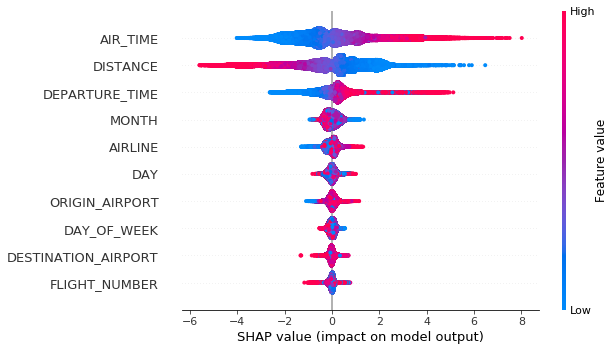

In [8]:
# summarize the effects of all the features
shap.summary_plot(shap_values, train)

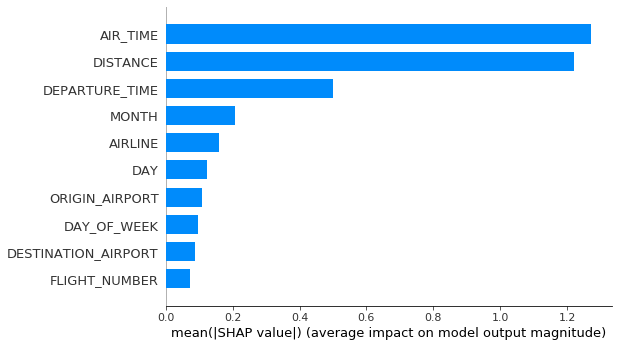

In [9]:
shap.summary_plot(shap_values, train, plot_type="bar")